In [1]:
!unzip -q /content/drive/MyDrive/Dataset/finger.zip

## Exploration

In [ ]:
import os
import cv2
import numpy as np

# Define function to load images and masks
def load_images_and_masks(img_dir, mask_dir):
    img_filenames = os.listdir(img_dir)
    mask_filenames = os.listdir(mask_dir)

    images = []
    masks = []

    for img_filename in img_filenames:
        img_path = os.path.join(img_dir, img_filename)
        mask_filename = img_filename.split('.')[0] + '.png'
        mask_path = os.path.join(mask_dir, mask_filename)

        if os.path.exists(mask_path):
            # Load image and mask
            img = cv2.imread(img_path)
            mask = cv2.imread(mask_path,0)

            images.append(img)
            masks.append(mask)

    return images, masks

# Define directories for images and masks
img_dir = "/content/finger/image"
mask_dir = "/content/finger/mask"

# Load images and masks
images, masks = load_images_and_masks(img_dir, mask_dir)

# Print details
print("Number of images:", len(images))
print("Number of masks:", len(masks))

# Print details for each image and mask
for i, (img, mask) in enumerate(zip(images, masks)):
    print("\nImage", i+1, "Details:")
    print("Shape:", img.shape)
    print("Datatype:", img.dtype)
    print("Size:", img.nbytes, "bytes")

    print("\nMask", i+1, "Details:")
    print("Shape:", mask.shape)
    print("Datatype:", mask.dtype)
    print("Size:", mask.nbytes, "bytes")


Number of images: 72
Number of masks: 72

Image 1 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 1 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 2 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 2 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 3 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 3 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 4 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 4 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 5 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 5 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 6 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 6 Details:
Shape: (512, 512)
Datatype: uint8
Size: 262144 bytes

Image 7 Details:
Shape: (512, 512, 3)
Datatype: uint8
Size: 786432 bytes

Mask 7 Details:
Shap

# **Preprocess**

# **1. Install Noise2Void and dependencies**
---

In [ ]:
!pip install -q n2v
!pip install -q wget
!pip install -q fpdf2
!pip install -q memory_profiler



#Force session restart
exit(0)
print('--------')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.0 MB/s eta 0:00:00
--------


## **1.3. Load key dependencies**
---
<font size = 4>

In [ ]:
from tifffile import imread, imsave



In [ ]:

Notebook_version = '1.16.2'
Network = 'Noise2Void (2D)'


from builtins import any as b_any

def get_requirements_path():
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    !pip freeze > $path

    df = pd.read_csv(path)
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list]
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item)

    file.close()

import sys
before = [str(m) for m in sys.modules]

import tensorflow
print('TensorFlow version:')
print(tensorflow.__version__)
print("Tensorflow enabled.")


from n2v.models import N2VConfig, N2V
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from csbdeep.io import save_tiff_imagej_compatible
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess


%load_ext memory_profiler

#Create a variable to get and store relative base path
base_path = os.getcwd()

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")


#PDF export
def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')

  Network = 'Noise2Void 2D'
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  # add another cell
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras','csbdeep']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  try:
    cuda_version = subprocess.run(["nvcc","--version"],stdout=subprocess.PIPE)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  except:
    cuda_version = ' - No cuda found - '
  try:
    gpu_name = subprocess.run(["nvidia-smi"],stdout=subprocess.PIPE)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  except:
    gpu_name = ' - No GPU found - '
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(os.path.join(Training_source, os.listdir(Training_source)[0])).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(Xdata.shape[0])+' image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(Xdata.shape[0])+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(26, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by default.'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.ln(1)
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{4}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{5}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,number_of_steps,percentage_validation,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.ln(1)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = full_model_path, align = 'L')
  pdf.ln(1)
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training Image', ln=1)
  pdf.ln(1)
  exp_size = io.imread(base_path + '/TrainingDataExample_N2V2D.png').shape
  pdf.image(base_path + '/TrainingDataExample_N2V2D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Noise2Void: Krull, Alexander, Tim-Oliver Buchholz, and Florian Jug. "Noise2void-learning denoising from single noisy images." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(os.path.join(full_model_path, model_name+"_training_report.pdf"))



  #Make a pdf summary of the QC results

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
      pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B')



  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L')
  pdf.ln(1)

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(os.path.join(full_QC_model_path, 'Quality Control/lossCurvePlots.png')).shape
  if os.path.exists(os.path.join(full_QC_model_path, 'Quality Control/lossCurvePlots.png')):
    pdf.image(os.path.join(full_QC_model_path, 'Quality Control/lossCurvePlots.png'), x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(os.path.join(full_QC_model_path, 'Quality Control/QC_example_data.png')).shape
  pdf.image(os.path.join(full_QC_model_path, 'Quality Control/QC_example_data.png'), x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Arial" >
  <table width=94% style="margin-left:0px;">"""
  with open(os.path.join(full_QC_model_path,'Quality Control/QC_metrics_'+QC_model_name+'.csv'), 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    mSSIM_PvsGT = header[1]
    mSSIM_SvsGT = header[2]
    NRMSE_PvsGT = header[3]
    NRMSE_SvsGT = header[4]
    PSNR_PvsGT = header[5]
    PSNR_SvsGT = header[6]
    header = """
    <tr>
    <th width = 10% align="left">{0}</th>
    <th width = 15% align="left">{1}</th>
    <th width = 15% align="center">{2}</th>
    <th width = 15% align="left">{3}</th>
    <th width = 15% align="center">{4}</th>
    <th width = 15% align="left">{5}</th>
    <th width = 15% align="center">{6}</th>
    </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT,NRMSE_PvsGT,NRMSE_SvsGT,PSNR_PvsGT,PSNR_SvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      mSSIM_PvsGT = row[1]
      mSSIM_SvsGT = row[2]
      NRMSE_PvsGT = row[3]
      NRMSE_SvsGT = row[4]
      PSNR_PvsGT = row[5]
      PSNR_SvsGT = row[6]
      cells = """
        <tr>
          <td width = 10% align="left">{0}</td>
          <td width = 15% align="center">{1}</td>
          <td width = 15% align="center">{2}</td>
          <td width = 15% align="center">{3}</td>
          <td width = 15% align="center">{4}</td>
          <td width = 15% align="center">{5}</td>
          <td width = 15% align="center">{6}</td>
        </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(NRMSE_SvsGT),3)),str(round(float(PSNR_PvsGT),3)),str(round(float(PSNR_SvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""

  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  pdf.ln(1)
  ref_2 = '- Noise2Void: Krull, Alexander, Tim-Oliver Buchholz, and Florian Jug. "Noise2void-learning denoising from single noisy images." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(1)
  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')
  pdf.ln(1)

  pdf.output(os.path.join(full_QC_model_path, 'Quality Control', QC_model_name+'_QC_report.pdf'))


# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)


TensorFlow version:
2.15.0
Tensorflow enabled.


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Notebook version: 1.16.2
Latest notebook version: 1.16.2
This notebook is up-to-date.


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**


In [ ]:

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Mon Mar 18 05:35:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              27W /  70W |    103MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-----

# **3. Select your parameters and paths**

---


In [ ]:
!unzip /content/gdrive/MyDrive/Dataset/finger.zip

## **3.1. Setting main training parameters**
---
<font size = 4>



Default advanced parameters enabled
Image dimensions (y,x,c) (512, 512, 3)
Parameters initiated.


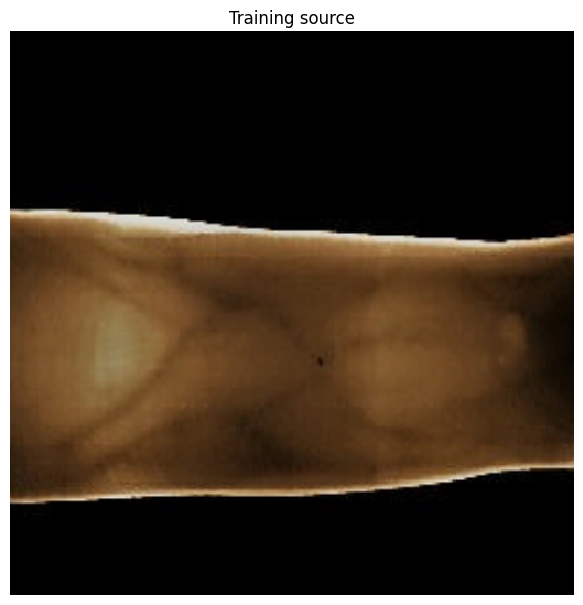

In [ ]:
datagen = N2V_DataGenerator()

Training_source = "/content/finger vein with mask/image"

training_images = Training_source
imgs = datagen.load_imgs_from_directory(directory = Training_source, filter='*.png', dims='YXC')
model_name = "n2v_model_1"
model_path = "/content/gdrive/MyDrive/Dataset/New_GAN/N2V_model"

full_model_path = os.path.join(model_path, model_name)

number_of_epochs =  100

patch_size =  64

Use_Default_Advanced_Parameters = True


batch_size =  128
number_of_steps = 0
percentage_validation =  10
initial_learning_rate = 0.0004


if (Use_Default_Advanced_Parameters):
  print("Default advanced parameters enabled")
  batch_size = 128
  percentage_validation = 10
  initial_learning_rate = 0.0004


if os.path.exists(full_model_path):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3"+W)



random_choice = random.choice(os.listdir(Training_source))
x = Image.open(Training_source+"/"+random_choice)
x = np.array(x)

if len(x.shape) == 3:
  print("Image dimensions (y,x,c)",x.shape)

if not len(x.shape) == 3:
  print(bcolors.WARNING +"Your images appear to have the wrong dimensions. Image dimension",x.shape)


Image_Y = x.shape[0]
Image_X = x.shape[1]


if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)

# Here we disable pre-trained model by default (in case the next cell is not run)
Use_pretrained_model = False

# Here we enable data augmentation by default (in case the cell is not ran)
Use_Data_augmentation = False

print("Parameters initiated.")

#Here we display one image
norm = simple_norm(x, percent = 99)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest', norm=norm, cmap='magma')
plt.title('Training source')
plt.axis('off');
plt.savefig(base_path + '/TrainingDataExample_N2V2D.png',bbox_inches='tight',pad_inches=0)


## **3.2. Data augmentation**
---

In [ ]:
#Data augmentation
Use_Data_augmentation = True

if Use_Data_augmentation:
  print("Data augmentation enabled")

if not Use_Data_augmentation:
  print("Data augmentation disabled")

Data augmentation enabled



## **3.3. Using weights from a pre-trained model as initial weights**
---


In [ ]:

Use_pretrained_model = False

pretrained_model_choice = "Model_from_file"

Weights_choice = "best"


pretrained_model_path = ""

if Use_pretrained_model:

  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")


  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = base_path + "/" + pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")




  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist')
    Use_pretrained_model = False


  if os.path.exists(h5_file_path):
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')

        if "learning rate" in csvRead.columns:
          print("pretrained network learning rate found")
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns:
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained nerwork will be used.')



# **4. Train the network**
---

Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (64, 64, 64, 3)
Generated patches: (

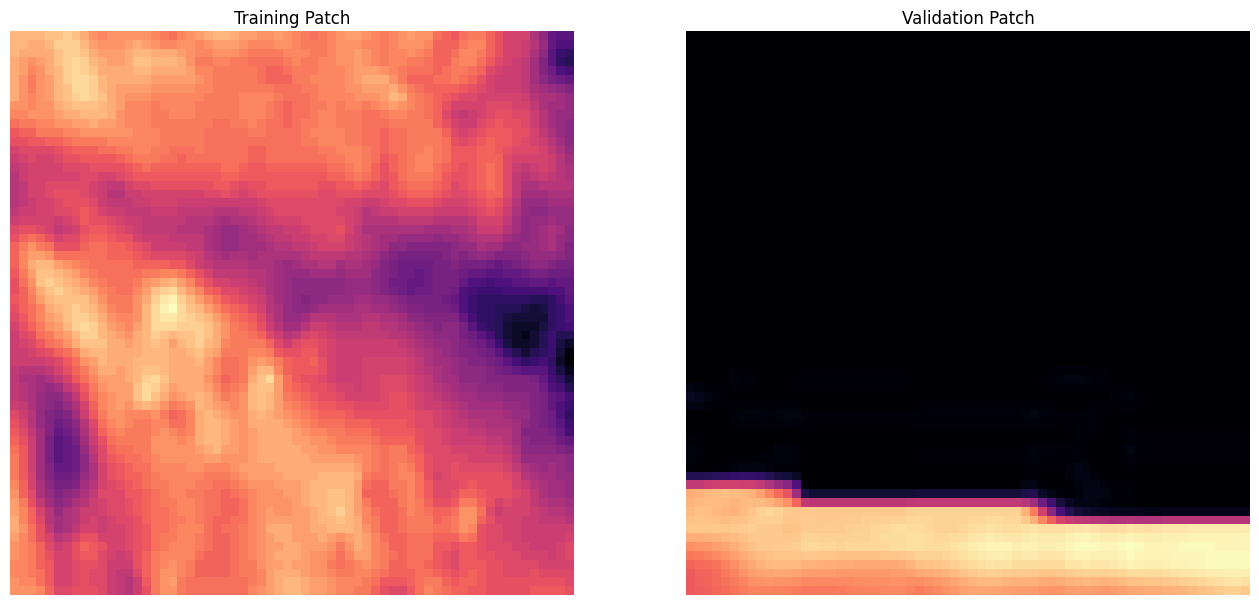

In [ ]:
if os.path.exists(full_model_path):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(full_model_path)


Xdata = datagen.generate_patches_from_list(imgs, shape=(patch_size,patch_size), augment=Use_Data_augmentation)
shape_of_Xdata = Xdata.shape
threshold = int(shape_of_Xdata[0]*(percentage_validation/100))
X = Xdata[threshold:]
X_val = Xdata[:threshold]
print(Xdata.shape[0],"patches created.")
print(threshold,"patch images for validation (",percentage_validation,"%).")
print(Xdata.shape[0]-threshold,"patch images for training.")
%memit

if (Use_Default_Advanced_Parameters):
  number_of_steps= int(X.shape[0]/batch_size)+1


if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":
    initial_learning_rate = bestLearningRate

config = N2VConfig(X, unet_kern_size=3,
                   train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs,
                   train_loss='mse', batch_norm=True, train_batch_size=batch_size, n2v_perc_pix=0.198,
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, train_learning_rate = initial_learning_rate)

vars(config)


model = N2V(config=config, name=model_name, basedir=model_path)


if Use_pretrained_model:
  model.load_weights(h5_file_path)

print("Setup done.")
print(config)


plt.figure(figsize=(16,87))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Validation Patch');

pdf_export(pretrained_model = Use_pretrained_model)

## **4.2. Start Training**
---





In [ ]:
start = time.time()

%memit

history = model.train(X, X_val)
print("Training done.")
%memit


print("Training, done.")

# convert the history.history dict to a pandas DataFrame:
lossData = pd.DataFrame(history.history)

if os.path.exists(os.path.join(full_model_path, "Quality Control")):
  shutil.rmtree(os.path.join(full_model_path, "Quality Control"))

os.makedirs(os.path.join(full_model_path, "Quality Control"))

# The training evaluation.csv is saved (overwrites the Files if needed).
lossDataCSVpath = os.path.join(full_model_path, "Quality Control", "training_evaluation.csv")
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60)
hour, mins = divmod(mins, 60)
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")


pdf_export(trained = True, pretrained_model = Use_pretrained_model)

peak memory: 1407.71 MiB, increment: 0.00 MiB
8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 460/460 [00:00<00:00, 1249.01it/s]


Epoch 1/100
 6/33 [====>.........................] - ETA: 9s - loss: 0.6870 - n2v_mse: 0.6870 - n2v_abs: 0.4846

33/33 [==============================] - 49s 590ms/step - loss: 0.2249 - n2v_mse: 0.2249 - n2v_abs: 0.2482 - val_loss: 0.7093 - val_n2v_mse: 0.6992 - val_n2v_abs: 0.6534 - lr: 4.0000e-04
Epoch 2/100
33/33 [==============================] - 14s 415ms/step - loss: 0.0498 - n2v_mse: 0.0498 - n2v_abs: 0.1342 - val_loss: 0.6017 - val_n2v_mse: 0.5940 - val_n2v_abs: 0.6011 - lr: 4.0000e-04
Epoch 3/100
33/33 [==============================] - 14s 413ms/step - loss: 0.0343 - n2v_mse: 0.0343 - n2v_abs: 0.1106 - val_loss: 0.5105 - val_n2v_mse: 0.5050 - val_n2v_abs: 0.5511 - lr: 4.0000e-04
Epoch 4/100
33/33 [==============================] - 13s 409ms/step - loss: 0.0324 - n2v_mse: 0.0324 - n2v_abs: 0.1113 - val_loss: 0.4396 - val_n2v_mse: 0.4356 - val_n2v_abs: 0.5106 - lr: 4.0000e-04
Epoch 5/100
33/33 [==============================] - 14s 432ms/step - loss: 0.0276 - n2v_mse: 0.0276 - n2v_abs: 0.1017 - val_loss: 0.3992 - val_n2v_mse: 0.3964 - val_n2v_abs: 0.4871 - lr: 4.0000e-04
Epoch 6/100
33/33

ValueError: 

In [ ]:
print(model)

N2V(n2v_model_1): YXC → YXC
├─ Directory: /content/gdrive/MyDrive/Dataset/New_GAN/N2V_model/n2v_model_1
└─ N2VConfig(means=['0.15085977', '0.09808925', '0.05667429'], stds=['0.1825797', '0.13426946', '0.099244334'], n_dim=2, axes='YXC', n_channel_in=3, n_channel_out=3, unet_residual=False, unet_n_depth=2, unet_kern_size=3, unet_n_first=32, unet_last_activation='linear', unet_input_shape=(None, None, 3), train_loss='mse', train_epochs=100, train_steps_per_epoch=33, train_learning_rate=0.0004, train_batch_size=128, train_tensorboard=True, train_checkpoint='weights_best.h5', train_reduce_lr={'factor': 0.5, 'patience': 10, 'verbose': True}, batch_norm=True, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=True, blurpool=False, skip_skipone=False, structN2Vmask=None, probabilistic=False, patch_shape=(64, 64))


# **5. Evaluate your model**
---



In [ ]:
# model name and path
Use_the_current_trained_model = True


QC_model_folder = ""

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model):
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = os.path.join(QC_model_path, QC_model_name)
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:

  print(bcolors.WARNING + '!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The n2v_model_1 network will be evaluated


## **5.1. Loss function**
---


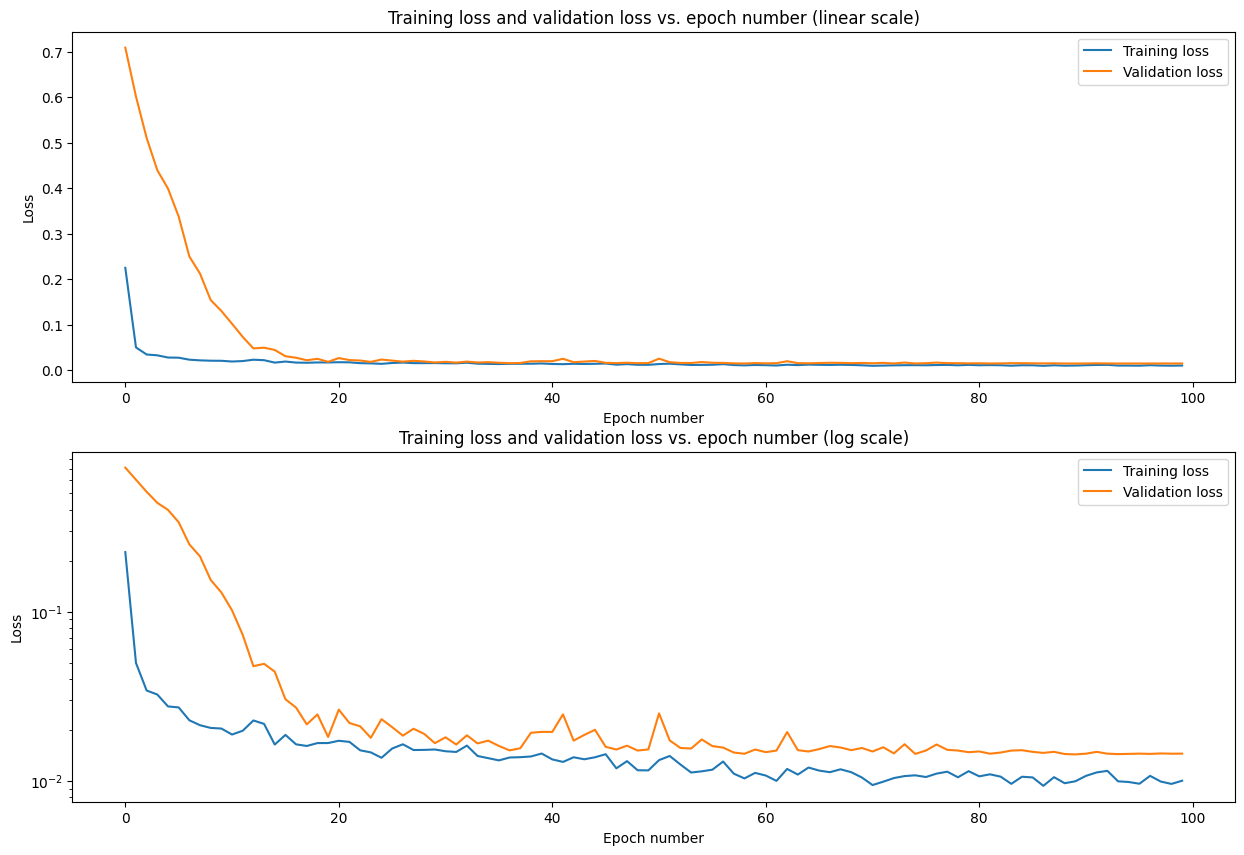

In [ ]:

lossDataFromCSV = []
vallossDataFromCSV = []

with open(os.path.join(full_QC_model_path, "Quality Control", "training_evaluation.csv"), "r") as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(os.path.join(full_QC_model_path, 'Quality Control/lossCurvePlots.png'))
plt.show()



# **6. Using the trained model**

---


## **6.1. Generate prediction(s) from unseen dataset**
---


In [ ]:
from PIL import Image
import os

# Directory containing PNG files
png_dir = '/content/finger vein with mask/image/'

# Directory to save TIFF files
tiff_dir = '/content/N2V_output/'

# Iterate over each PNG file in the directory
for filename in os.listdir(png_dir):
    if filename.endswith('.png'):
        # Open PNG file
        png_image = Image.open(os.path.join(png_dir, filename))

        # Convert PNG to TIFF and save
        tiff_filename = os.path.splitext(filename)[0] + '.tiff'
        png_image.save(os.path.join(tiff_dir, tiff_filename))


In [ ]:
Single_Images = 1
Stacks = 2


Data_folder = "/content/TIFF_input"
Result_folder = "/content/N2V_output"


Data_type = Single_Images
Use_the_current_trained_model = True


Prediction_model_folder = ""
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model):
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = os.path.join(Prediction_model_path, Prediction_model_name)
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  print(bcolors.WARNING +'!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')


config = None
model = N2V(config, Prediction_model_name, basedir=Prediction_model_path)

thisdir = Path(Data_folder)
outputdir = Path(Result_folder)

for r, d, f in os.walk(thisdir):
    for file in f:
        if ".tif" in file:
            print(os.path.join(r, file))

if Data_type == 1 :
  print("Single images are now beeing predicted")

# Loop through the files
  for r, d, f in os.walk(thisdir):
    for file in f:
      base_filename = os.path.basename(file)
      input_train = imread(os.path.join(r, file))
      pred_train = model.predict(input_train, axes='YXC')
      save_tiff_imagej_compatible(os.path.join(outputdir, base_filename), pred_train, axes='YXC')

  print("Images saved into folder:", Result_folder)




Using current trained network
The n2v_model_1 network will be used.
Loading network weights from 'weights_best.h5'.
/content/TIFF_input/index_1-ConvertImage_2.tiff
/content/TIFF_input/index_5-ConvertImage_2.tiff
/content/TIFF_input/ring_4-ConvertImage_1.tiff
/content/TIFF_input/ring_4-ConvertImage_3.tiff
/content/TIFF_input/ring_5-ConvertImage_0.tiff
/content/TIFF_input/index_6-ConvertImage_2.tiff
/content/TIFF_input/index_5-ConvertImage_1.tiff
/content/TIFF_input/ring_1-ConvertImage_0.tiff
/content/TIFF_input/ring_6-ConvertImage_1.tiff
/content/TIFF_input/ring_3-ConvertImage_1.tiff
/content/TIFF_input/ring_6-ConvertImage_3.tiff
/content/TIFF_input/ring_4-ConvertImage_0.tiff
/content/TIFF_input/ring_5-ConvertImage_1.tiff
/content/TIFF_input/ring_2-ConvertImage_3.tiff
/content/TIFF_input/index_4-ConvertImage_2.tiff
/content/TIFF_input/index_5-ConvertImage_0.tiff
/content/TIFF_input/middle_2-ConvertImage_1.tiff
/content/TIFF_input/middle_5-ConvertImage_2.tiff
/content/TIFF_input/index_6-

# GAN pix to pix

In [ ]:
!pip -q install tensorflow==2.8

In [ ]:
!pip -q install keras==2.7

In [ ]:
import tensorflow
import keras

In [ ]:
print("keras -",keras.__version__)           #the version should be 2.7.0
print("tensorflow -",tensorflow.__version__) #the version should be 2.8.0

keras - 2.7.0
tensorflow - 2.8.0


In [ ]:
import glob
import os
import cv2
import numpy as np
from matplotlib import pyplot
import keras
from numpy import zeros
from numpy import ones
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
def define_discriminator(image_shape):

	init = RandomNormal(stddev=0.02)

	in_src_image = Input(shape=image_shape)
	in_target_image = Input(shape=image_shape)

	merged = Concatenate()([in_src_image, in_target_image])

	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)


	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

def conv_block(inputs, filters, kernel_size=(3, 3), activation='relu', padding='same'):
    conv = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(inputs)
    conv = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(conv)
    return conv

def upsample_block(inputs, skip_connections, filters, kernel_size=(3, 3), activation='relu', padding='same'):
    upsample = layers.UpSampling2D((2, 2))(inputs)
    concat = layers.Concatenate()([upsample, skip_connections])
    conv = conv_block(concat, filters, kernel_size, activation, padding)
    return conv

def define_generator(input_shape):
    resnet = ResNet50(include_top=False, input_shape=input_shape)

    # Encoder
    encoder_output = resnet.get_layer('conv4_block6_out').output

    # Bridge
    bridge = conv_block(encoder_output, 512)

    # Decoder
    decoder = upsample_block(bridge, resnet.get_layer('conv3_block4_out').output, 256)
    decoder = upsample_block(decoder, resnet.get_layer('conv2_block3_out').output, 128)
    decoder = upsample_block(decoder, resnet.get_layer('conv1_relu').output, 64)

    # Output
    outputs = layers.Conv2D(1, (1, 1), activation='tanh')(decoder)

    model = models.Model(inputs=resnet.input, outputs=outputs)
    return model

# Create the model
input_shape = (256, 256, 3)
model = create_resnet50_unet(input_shape)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False       #Descriminator layers set to untrainable in the combined GAN but
                                                #standalone descriminator will be trainable.

	in_src = Input(shape=image_shape)
	gen_out = g_model(in_src)
	dis_out = d_model([in_src, gen_out])
	model = Model(in_src, [dis_out, gen_out])
	opt = Adam(lr=0.0002, beta_1=0.5)

    #Total loss is the weighted sum of adversarial loss (BCE) and L1 loss (MAE)
    #Authors suggested weighting BCE vs L1 as 1:100.
	model.compile(loss=['binary_crossentropy', 'mae'],
               optimizer=opt, loss_weights=[1,100])
	return model

In [ ]:
def generate_real_samples(dataset, n_samples, patch_shape):
	trainA, trainB = dataset
	ix = randint(0, trainA.shape[0], n_samples)
	X1, X2 = trainA[ix], trainB[ix]
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [ ]:
def generate_fake_samples(g_model, samples, patch_shape):
	X = g_model.predict(samples)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y


In [ ]:
def summarize_performance(step, g_model, dataset, n_samples=3):
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0

	for i in tqdm(range(n_samples)):
		plt.subplot(3, n_samples, 1 + i)
		plt.axis('off')
		plt.title('Input image')
		plt.imshow(X_realA[i])

	# plot generated target image
	for i in tqdm(range(n_samples)):
		plt.subplot(3, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.title('Generated Image')
		plt.imshow(X_fakeB[i])

	# plot real target image
	for i in tqdm(range(n_samples)):
		plt.subplot(3, n_samples, 1 + n_samples*2 + i)
		plt.axis('off')
		plt.title('Target Image')
		plt.imshow(X_realB[i])

	# save plot to file
	save_img = "/content/drive/MyDrive/Dataset/New_GAN/Result_img/" #make a sutable path inside the drive and point the variable to that dir
	filename1 = 'plot_%06d.png' % (step+1)
	plt.savefig(save_img + filename1)
	plt.close()

	# save the generator model
	save_model = "/content/drive/MyDrive/Dataset/New_GAN/Saved_model/" # change this path also in a similar fashion
	#filename2 = 'model_%06d.h5' % (step+1) #uncomment this line to save each model individually
	filename2 = 'GAN_final_model.h5' #or use this line to overwrite each save file         #then save this code block and  run the code again
	g_model.save(save_model + filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:

# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs, n_batch=1):
	n_patch = d_model.output_shape[1]
	trainA, trainB = dataset
	bat_per_epo = int(len(trainA) / n_batch)
	n_steps = bat_per_epo * n_epochs
	for i in tqdm(range(n_steps)):
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		print('>%d, d1_loss:[%.3f] d2_loss:[%.3f] generator_loss:[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo) == 0:
			summarize_performance(i, g_model, dataset)

In [ ]:
SIZE_X = 256
SIZE_Y = 256

In [ ]:
from tqdm.auto import tqdm

In [ ]:

#Capture target image as a list
tar_images = []

for directory_path in glob.glob("/content/finger/Msk/mask/"):
    for img_path in tqdm(glob.glob(os.path.join(directory_path, "*.png"))):
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        tar_images.append(img)

#Convert list to array for machine learning processing
tar_images = np.array(tar_images)

  0%|          | 0/72 [00:00<?, ?it/s]

In [ ]:
#Capture input image as a list
src_images = []
for directory_path in glob.glob("/content/finger/Img/image/"):
    for mask_path in tqdm(glob.glob(os.path.join(directory_path, "*.png"))):
        mask = cv2.imread(mask_path, 1)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
        src_images.append(mask)

#Convert list to array for machine learning processing
src_images = np.array(src_images)



  0%|          | 0/72 [00:00<?, ?it/s]

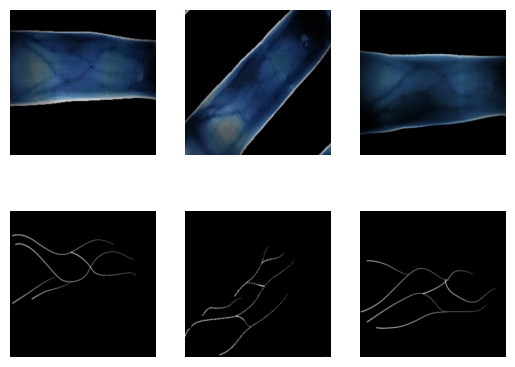

In [ ]:
# plot inupt image
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i])
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i])
pyplot.show()

In [ ]:
image_shape = src_images.shape[1:]
print(image_shape)

(256, 256, 3)


In [ ]:
d_model = define_discriminator(image_shape)

In [ ]:
g_model = define_generator(image_shape)

In [ ]:
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

In [ ]:
# load and prepare training images
data = [src_images, tar_images]
#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)

In [ ]:
from datetime import datetime
start1 = datetime.now()

train(d_model, g_model, gan_model, dataset, n_epochs=50, n_batch=1)

stop1 = datetime.now()
#Execution time of the model
execution_time = stop1-start1
print("Execution time is: ", execution_time)

  0%|          | 0/3600 [00:00<?, ?it/s]

>1, d1_loss:[0.342] d2_loss:[0.314] generator_loss:[3.098]
>2, d1_loss:[0.255] d2_loss:[0.349] generator_loss:[2.492]
>3, d1_loss:[0.281] d2_loss:[0.299] generator_loss:[2.744]
>4, d1_loss:[0.269] d2_loss:[0.297] generator_loss:[5.406]
>5, d1_loss:[0.276] d2_loss:[0.299] generator_loss:[2.671]
>6, d1_loss:[0.250] d2_loss:[0.302] generator_loss:[2.676]
>7, d1_loss:[0.250] d2_loss:[0.328] generator_loss:[2.857]
>8, d1_loss:[0.280] d2_loss:[0.285] generator_loss:[2.598]
>9, d1_loss:[0.278] d2_loss:[0.287] generator_loss:[2.791]
>10, d1_loss:[0.263] d2_loss:[0.289] generator_loss:[2.827]
>11, d1_loss:[0.207] d2_loss:[0.294] generator_loss:[3.246]
>12, d1_loss:[0.305] d2_loss:[0.289] generator_loss:[2.894]
>13, d1_loss:[0.210] d2_loss:[0.727] generator_loss:[2.782]
>14, d1_loss:[0.435] d2_loss:[1.129] generator_loss:[3.966]
>15, d1_loss:[0.921] d2_loss:[0.427] generator_loss:[2.804]
>16, d1_loss:[0.559] d2_loss:[0.341] generator_loss:[2.523]
>17, d1_loss:[0.419] d2_loss:[0.355] generator_lo

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000072.png and GAN_final_model.h5
>73, d1_loss:[0.343] d2_loss:[0.348] generator_loss:[2.152]
>74, d1_loss:[0.339] d2_loss:[0.348] generator_loss:[2.919]
>75, d1_loss:[0.336] d2_loss:[0.347] generator_loss:[2.815]
>76, d1_loss:[0.333] d2_loss:[0.347] generator_loss:[2.545]
>77, d1_loss:[0.338] d2_loss:[0.347] generator_loss:[2.833]
>78, d1_loss:[0.333] d2_loss:[0.345] generator_loss:[2.666]
>79, d1_loss:[0.337] d2_loss:[0.358] generator_loss:[3.801]
>80, d1_loss:[0.343] d2_loss:[0.346] generator_loss:[2.157]
>81, d1_loss:[0.349] d2_loss:[0.348] generator_loss:[2.494]
>82, d1_loss:[0.344] d2_loss:[0.348] generator_loss:[2.906]
>83, d1_loss:[0.349] d2_loss:[0.347] generator_loss:[3.797]
>84, d1_loss:[0.338] d2_loss:[0.348] generator_loss:[2.904]
>85, d1_loss:[0.333] d2_loss:[0.348] generator_loss:[3.008]
>86, d1_loss:[0.288] d2_loss:[0.345] generator_loss:[5.279]
>87, d1_loss:[0.331] d2_loss:[0.345] generator_loss:[2.558]
>88, d1_loss:[0.330] d2_loss:[0.344] generator_loss:[

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000144.png and GAN_final_model.h5
>145, d1_loss:[0.349] d2_loss:[0.360] generator_loss:[2.608]
>146, d1_loss:[0.341] d2_loss:[0.356] generator_loss:[2.563]
>147, d1_loss:[0.340] d2_loss:[0.355] generator_loss:[2.507]
>148, d1_loss:[0.334] d2_loss:[0.353] generator_loss:[2.629]
>149, d1_loss:[0.321] d2_loss:[0.350] generator_loss:[2.460]
>150, d1_loss:[0.309] d2_loss:[0.348] generator_loss:[3.930]
>151, d1_loss:[0.327] d2_loss:[0.344] generator_loss:[2.364]
>152, d1_loss:[0.316] d2_loss:[0.345] generator_loss:[2.523]
>153, d1_loss:[0.305] d2_loss:[0.340] generator_loss:[2.443]
>154, d1_loss:[0.301] d2_loss:[0.337] generator_loss:[2.836]
>155, d1_loss:[0.306] d2_loss:[0.337] generator_loss:[2.662]
>156, d1_loss:[0.301] d2_loss:[0.331] generator_loss:[2.217]
>157, d1_loss:[0.287] d2_loss:[0.330] generator_loss:[2.973]
>158, d1_loss:[0.279] d2_loss:[0.322] generator_loss:[2.999]
>159, d1_loss:[0.291] d2_loss:[0.373] generator_loss:[2.755]
>160, d1_loss:[0.297] d2_loss:[0.311] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000216.png and GAN_final_model.h5
>217, d1_loss:[0.258] d2_loss:[0.241] generator_loss:[5.827]
>218, d1_loss:[0.247] d2_loss:[0.249] generator_loss:[3.446]
>219, d1_loss:[0.289] d2_loss:[0.261] generator_loss:[2.543]
>220, d1_loss:[0.261] d2_loss:[0.251] generator_loss:[3.259]
>221, d1_loss:[0.260] d2_loss:[0.276] generator_loss:[2.769]
>222, d1_loss:[0.267] d2_loss:[0.238] generator_loss:[5.820]
>223, d1_loss:[0.277] d2_loss:[0.251] generator_loss:[3.387]
>224, d1_loss:[0.274] d2_loss:[0.247] generator_loss:[2.608]
>225, d1_loss:[0.396] d2_loss:[0.276] generator_loss:[3.203]
>226, d1_loss:[0.209] d2_loss:[0.502] generator_loss:[2.887]
>227, d1_loss:[0.411] d2_loss:[0.328] generator_loss:[3.083]
>228, d1_loss:[0.412] d2_loss:[0.380] generator_loss:[3.079]
>229, d1_loss:[0.341] d2_loss:[0.340] generator_loss:[3.057]
>230, d1_loss:[0.368] d2_loss:[0.324] generator_loss:[2.215]
>231, d1_loss:[0.330] d2_loss:[0.353] generator_loss:[2.728]
>232, d1_loss:[0.323] d2_loss:[0.322] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000288.png and GAN_final_model.h5
>289, d1_loss:[0.281] d2_loss:[0.225] generator_loss:[2.725]
>290, d1_loss:[0.322] d2_loss:[0.231] generator_loss:[3.015]
>291, d1_loss:[0.191] d2_loss:[0.240] generator_loss:[4.547]
>292, d1_loss:[0.260] d2_loss:[0.210] generator_loss:[6.068]
>293, d1_loss:[0.305] d2_loss:[0.220] generator_loss:[3.025]
>294, d1_loss:[0.317] d2_loss:[0.234] generator_loss:[3.030]
>295, d1_loss:[0.198] d2_loss:[0.325] generator_loss:[3.660]
>296, d1_loss:[0.216] d2_loss:[0.234] generator_loss:[3.824]
>297, d1_loss:[0.258] d2_loss:[0.274] generator_loss:[3.197]
>298, d1_loss:[0.229] d2_loss:[0.239] generator_loss:[3.093]
>299, d1_loss:[0.224] d2_loss:[0.220] generator_loss:[4.615]
>300, d1_loss:[0.270] d2_loss:[0.221] generator_loss:[3.273]
>301, d1_loss:[0.290] d2_loss:[0.227] generator_loss:[3.171]
>302, d1_loss:[0.209] d2_loss:[0.213] generator_loss:[3.837]
>303, d1_loss:[0.394] d2_loss:[0.218] generator_loss:[3.215]
>304, d1_loss:[0.195] d2_loss:[0.273] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000360.png and GAN_final_model.h5
>361, d1_loss:[0.255] d2_loss:[0.178] generator_loss:[3.884]
>362, d1_loss:[0.260] d2_loss:[0.210] generator_loss:[3.056]
>363, d1_loss:[0.233] d2_loss:[0.192] generator_loss:[3.593]
>364, d1_loss:[0.256] d2_loss:[0.195] generator_loss:[3.242]
>365, d1_loss:[0.262] d2_loss:[0.190] generator_loss:[6.196]
>366, d1_loss:[0.242] d2_loss:[0.198] generator_loss:[3.647]
>367, d1_loss:[0.268] d2_loss:[0.190] generator_loss:[6.200]
>368, d1_loss:[0.238] d2_loss:[0.222] generator_loss:[2.869]
>369, d1_loss:[0.179] d2_loss:[0.178] generator_loss:[4.384]
>370, d1_loss:[0.214] d2_loss:[0.176] generator_loss:[3.814]
>371, d1_loss:[0.317] d2_loss:[0.520] generator_loss:[3.153]
>372, d1_loss:[0.205] d2_loss:[0.818] generator_loss:[3.144]
>373, d1_loss:[0.430] d2_loss:[0.266] generator_loss:[3.217]
>374, d1_loss:[0.449] d2_loss:[0.304] generator_loss:[3.156]
>375, d1_loss:[0.323] d2_loss:[0.302] generator_loss:[2.745]
>376, d1_loss:[0.273] d2_loss:[0.274] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000432.png and GAN_final_model.h5
>433, d1_loss:[0.270] d2_loss:[0.211] generator_loss:[3.278]
>434, d1_loss:[0.248] d2_loss:[0.196] generator_loss:[3.448]
>435, d1_loss:[0.262] d2_loss:[0.213] generator_loss:[3.109]
>436, d1_loss:[0.429] d2_loss:[0.240] generator_loss:[2.493]
>437, d1_loss:[0.278] d2_loss:[0.269] generator_loss:[3.120]
>438, d1_loss:[0.243] d2_loss:[0.237] generator_loss:[5.752]
>439, d1_loss:[0.221] d2_loss:[0.221] generator_loss:[3.282]
>440, d1_loss:[0.256] d2_loss:[0.205] generator_loss:[3.210]
>441, d1_loss:[0.258] d2_loss:[0.206] generator_loss:[3.220]
>442, d1_loss:[0.428] d2_loss:[0.246] generator_loss:[2.468]
>443, d1_loss:[0.226] d2_loss:[0.288] generator_loss:[3.078]
>444, d1_loss:[0.219] d2_loss:[0.234] generator_loss:[3.129]
>445, d1_loss:[0.255] d2_loss:[0.217] generator_loss:[3.105]
>446, d1_loss:[0.261] d2_loss:[0.222] generator_loss:[3.160]
>447, d1_loss:[0.223] d2_loss:[0.194] generator_loss:[4.812]
>448, d1_loss:[0.258] d2_loss:[0.193] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000504.png and GAN_final_model.h5
>505, d1_loss:[0.219] d2_loss:[0.193] generator_loss:[4.341]
>506, d1_loss:[0.265] d2_loss:[0.192] generator_loss:[3.365]
>507, d1_loss:[0.274] d2_loss:[0.192] generator_loss:[3.245]
>508, d1_loss:[0.253] d2_loss:[0.189] generator_loss:[3.351]
>509, d1_loss:[0.270] d2_loss:[0.176] generator_loss:[3.777]
>510, d1_loss:[0.234] d2_loss:[0.205] generator_loss:[3.306]
>511, d1_loss:[0.184] d2_loss:[0.212] generator_loss:[3.462]
>512, d1_loss:[0.281] d2_loss:[0.176] generator_loss:[6.436]
>513, d1_loss:[0.196] d2_loss:[0.186] generator_loss:[4.006]
>514, d1_loss:[0.225] d2_loss:[0.182] generator_loss:[4.011]
>515, d1_loss:[0.266] d2_loss:[0.193] generator_loss:[3.320]
>516, d1_loss:[0.264] d2_loss:[0.197] generator_loss:[3.184]
>517, d1_loss:[0.188] d2_loss:[0.196] generator_loss:[3.912]
>518, d1_loss:[0.410] d2_loss:[0.224] generator_loss:[2.609]
>519, d1_loss:[0.248] d2_loss:[0.240] generator_loss:[5.896]
>520, d1_loss:[0.241] d2_loss:[0.206] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000576.png and GAN_final_model.h5
>577, d1_loss:[0.183] d2_loss:[0.172] generator_loss:[4.196]
>578, d1_loss:[0.303] d2_loss:[0.232] generator_loss:[3.748]
>579, d1_loss:[0.181] d2_loss:[0.194] generator_loss:[3.798]
>580, d1_loss:[0.188] d2_loss:[0.179] generator_loss:[4.061]
>581, d1_loss:[0.213] d2_loss:[0.162] generator_loss:[4.044]
>582, d1_loss:[0.225] d2_loss:[0.170] generator_loss:[3.591]
>583, d1_loss:[0.227] d2_loss:[0.174] generator_loss:[3.802]
>584, d1_loss:[0.219] d2_loss:[0.170] generator_loss:[3.643]
>585, d1_loss:[0.184] d2_loss:[0.160] generator_loss:[5.250]
>586, d1_loss:[0.274] d2_loss:[0.197] generator_loss:[3.018]
>587, d1_loss:[0.185] d2_loss:[0.169] generator_loss:[4.147]
>588, d1_loss:[0.297] d2_loss:[0.180] generator_loss:[6.535]
>589, d1_loss:[0.239] d2_loss:[0.186] generator_loss:[3.515]
>590, d1_loss:[0.182] d2_loss:[0.163] generator_loss:[5.257]
>591, d1_loss:[0.181] d2_loss:[0.180] generator_loss:[3.719]
>592, d1_loss:[0.261] d2_loss:[0.179] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000648.png and GAN_final_model.h5
>649, d1_loss:[0.291] d2_loss:[0.217] generator_loss:[2.935]
>650, d1_loss:[0.274] d2_loss:[0.206] generator_loss:[4.518]
>651, d1_loss:[0.193] d2_loss:[0.203] generator_loss:[3.788]
>652, d1_loss:[0.318] d2_loss:[0.191] generator_loss:[3.347]
>653, d1_loss:[0.366] d2_loss:[0.274] generator_loss:[2.663]
>654, d1_loss:[0.240] d2_loss:[0.230] generator_loss:[5.971]
>655, d1_loss:[0.401] d2_loss:[0.256] generator_loss:[2.573]
>656, d1_loss:[0.246] d2_loss:[0.248] generator_loss:[2.955]
>657, d1_loss:[0.248] d2_loss:[0.221] generator_loss:[3.050]
>658, d1_loss:[0.254] d2_loss:[0.230] generator_loss:[2.793]
>659, d1_loss:[0.247] d2_loss:[0.218] generator_loss:[2.887]
>660, d1_loss:[0.194] d2_loss:[0.193] generator_loss:[3.935]
>661, d1_loss:[0.280] d2_loss:[0.201] generator_loss:[3.326]
>662, d1_loss:[0.200] d2_loss:[0.179] generator_loss:[5.020]
>663, d1_loss:[0.269] d2_loss:[0.210] generator_loss:[2.917]
>664, d1_loss:[0.221] d2_loss:[0.183] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000720.png and GAN_final_model.h5
>721, d1_loss:[0.188] d2_loss:[0.176] generator_loss:[4.242]
>722, d1_loss:[0.261] d2_loss:[0.193] generator_loss:[3.625]
>723, d1_loss:[0.208] d2_loss:[0.158] generator_loss:[4.497]
>724, d1_loss:[0.199] d2_loss:[0.175] generator_loss:[4.352]
>725, d1_loss:[0.337] d2_loss:[0.177] generator_loss:[3.444]
>726, d1_loss:[0.183] d2_loss:[0.205] generator_loss:[3.676]
>727, d1_loss:[0.159] d2_loss:[0.193] generator_loss:[3.552]
>728, d1_loss:[0.298] d2_loss:[0.174] generator_loss:[3.598]
>729, d1_loss:[0.204] d2_loss:[0.196] generator_loss:[4.834]
>730, d1_loss:[0.198] d2_loss:[0.173] generator_loss:[4.181]
>731, d1_loss:[0.288] d2_loss:[0.174] generator_loss:[3.565]
>732, d1_loss:[0.240] d2_loss:[0.180] generator_loss:[3.709]
>733, d1_loss:[0.305] d2_loss:[0.221] generator_loss:[2.801]
>734, d1_loss:[0.252] d2_loss:[0.281] generator_loss:[6.462]
>735, d1_loss:[0.206] d2_loss:[0.198] generator_loss:[4.282]
>736, d1_loss:[0.350] d2_loss:[0.249] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000792.png and GAN_final_model.h5
>793, d1_loss:[0.163] d2_loss:[0.217] generator_loss:[3.270]
>794, d1_loss:[0.250] d2_loss:[0.205] generator_loss:[3.064]
>795, d1_loss:[0.264] d2_loss:[0.215] generator_loss:[6.303]
>796, d1_loss:[0.212] d2_loss:[0.174] generator_loss:[4.109]
>797, d1_loss:[0.177] d2_loss:[0.196] generator_loss:[3.439]
>798, d1_loss:[0.201] d2_loss:[0.172] generator_loss:[4.200]
>799, d1_loss:[0.274] d2_loss:[0.167] generator_loss:[3.596]
>800, d1_loss:[0.275] d2_loss:[0.176] generator_loss:[6.297]
>801, d1_loss:[0.265] d2_loss:[0.198] generator_loss:[3.164]
>802, d1_loss:[0.266] d2_loss:[0.191] generator_loss:[3.317]
>803, d1_loss:[0.182] d2_loss:[0.189] generator_loss:[3.948]
>804, d1_loss:[0.235] d2_loss:[0.188] generator_loss:[3.449]
>805, d1_loss:[0.213] d2_loss:[0.177] generator_loss:[3.799]
>806, d1_loss:[0.251] d2_loss:[0.194] generator_loss:[3.088]
>807, d1_loss:[0.230] d2_loss:[0.176] generator_loss:[3.893]
>808, d1_loss:[0.201] d2_loss:[0.167] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000864.png and GAN_final_model.h5
>865, d1_loss:[0.244] d2_loss:[0.191] generator_loss:[3.199]
>866, d1_loss:[0.161] d2_loss:[0.176] generator_loss:[5.005]
>867, d1_loss:[0.198] d2_loss:[0.167] generator_loss:[4.204]
>868, d1_loss:[0.240] d2_loss:[0.183] generator_loss:[3.861]
>869, d1_loss:[0.228] d2_loss:[0.317] generator_loss:[3.454]
>870, d1_loss:[0.193] d2_loss:[0.202] generator_loss:[3.743]
>871, d1_loss:[0.295] d2_loss:[0.205] generator_loss:[3.837]
>872, d1_loss:[0.216] d2_loss:[0.204] generator_loss:[3.677]
>873, d1_loss:[0.207] d2_loss:[0.204] generator_loss:[3.485]
>874, d1_loss:[0.278] d2_loss:[0.194] generator_loss:[6.197]
>875, d1_loss:[0.248] d2_loss:[0.209] generator_loss:[2.887]
>876, d1_loss:[0.248] d2_loss:[0.190] generator_loss:[6.282]
>877, d1_loss:[0.239] d2_loss:[0.209] generator_loss:[2.998]
>878, d1_loss:[0.182] d2_loss:[0.208] generator_loss:[3.441]
>879, d1_loss:[0.268] d2_loss:[0.190] generator_loss:[3.493]
>880, d1_loss:[0.275] d2_loss:[0.179] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_000936.png and GAN_final_model.h5
>937, d1_loss:[0.182] d2_loss:[0.177] generator_loss:[4.230]
>938, d1_loss:[0.214] d2_loss:[0.161] generator_loss:[4.443]
>939, d1_loss:[0.171] d2_loss:[0.183] generator_loss:[3.720]
>940, d1_loss:[0.181] d2_loss:[0.151] generator_loss:[4.525]
>941, d1_loss:[0.206] d2_loss:[0.150] generator_loss:[4.604]
>942, d1_loss:[0.181] d2_loss:[0.166] generator_loss:[4.419]
>943, d1_loss:[0.271] d2_loss:[0.174] generator_loss:[3.634]
>944, d1_loss:[0.247] d2_loss:[0.179] generator_loss:[3.555]
>945, d1_loss:[0.358] d2_loss:[0.190] generator_loss:[2.863]
>946, d1_loss:[0.203] d2_loss:[0.198] generator_loss:[3.523]
>947, d1_loss:[0.250] d2_loss:[0.193] generator_loss:[3.206]
>948, d1_loss:[0.171] d2_loss:[0.184] generator_loss:[4.050]
>949, d1_loss:[0.243] d2_loss:[0.184] generator_loss:[3.497]
>950, d1_loss:[0.172] d2_loss:[0.171] generator_loss:[4.353]
>951, d1_loss:[0.238] d2_loss:[0.173] generator_loss:[3.768]
>952, d1_loss:[0.196] d2_loss:[0.158] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001008.png and GAN_final_model.h5
>1009, d1_loss:[0.200] d2_loss:[0.164] generator_loss:[3.844]
>1010, d1_loss:[0.271] d2_loss:[0.157] generator_loss:[6.611]
>1011, d1_loss:[0.245] d2_loss:[0.165] generator_loss:[3.715]
>1012, d1_loss:[0.167] d2_loss:[0.179] generator_loss:[3.988]
>1013, d1_loss:[0.257] d2_loss:[0.169] generator_loss:[3.606]
>1014, d1_loss:[0.239] d2_loss:[0.181] generator_loss:[3.204]
>1015, d1_loss:[0.189] d2_loss:[0.161] generator_loss:[4.244]
>1016, d1_loss:[0.214] d2_loss:[0.162] generator_loss:[4.204]
>1017, d1_loss:[0.265] d2_loss:[0.175] generator_loss:[3.538]
>1018, d1_loss:[0.226] d2_loss:[0.192] generator_loss:[3.464]
>1019, d1_loss:[0.256] d2_loss:[0.167] generator_loss:[6.562]
>1020, d1_loss:[0.154] d2_loss:[0.172] generator_loss:[4.208]
>1021, d1_loss:[0.195] d2_loss:[0.161] generator_loss:[3.983]
>1022, d1_loss:[0.239] d2_loss:[0.164] generator_loss:[4.171]
>1023, d1_loss:[0.155] d2_loss:[0.177] generator_loss:[3.843]
>1024, d1_loss:[0.253] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001080.png and GAN_final_model.h5
>1081, d1_loss:[0.177] d2_loss:[0.155] generator_loss:[4.854]
>1082, d1_loss:[0.250] d2_loss:[0.176] generator_loss:[3.303]
>1083, d1_loss:[0.241] d2_loss:[0.202] generator_loss:[3.114]
>1084, d1_loss:[0.185] d2_loss:[0.163] generator_loss:[4.373]
>1085, d1_loss:[0.192] d2_loss:[0.161] generator_loss:[4.033]
>1086, d1_loss:[0.201] d2_loss:[0.162] generator_loss:[4.218]
>1087, d1_loss:[0.202] d2_loss:[0.158] generator_loss:[4.323]
>1088, d1_loss:[0.241] d2_loss:[0.168] generator_loss:[3.873]
>1089, d1_loss:[0.172] d2_loss:[0.161] generator_loss:[4.437]
>1090, d1_loss:[0.175] d2_loss:[0.154] generator_loss:[4.369]
>1091, d1_loss:[0.185] d2_loss:[0.156] generator_loss:[4.734]
>1092, d1_loss:[0.295] d2_loss:[0.180] generator_loss:[3.099]
>1093, d1_loss:[0.225] d2_loss:[0.177] generator_loss:[3.997]
>1094, d1_loss:[0.220] d2_loss:[0.176] generator_loss:[3.703]
>1095, d1_loss:[0.232] d2_loss:[0.177] generator_loss:[3.547]
>1096, d1_loss:[0.243] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001152.png and GAN_final_model.h5
>1153, d1_loss:[0.243] d2_loss:[0.156] generator_loss:[6.752]
>1154, d1_loss:[0.261] d2_loss:[0.165] generator_loss:[6.545]
>1155, d1_loss:[0.176] d2_loss:[0.158] generator_loss:[4.610]
>1156, d1_loss:[0.214] d2_loss:[0.185] generator_loss:[3.658]
>1157, d1_loss:[0.161] d2_loss:[0.170] generator_loss:[4.507]
>1158, d1_loss:[0.266] d2_loss:[0.163] generator_loss:[3.813]
>1159, d1_loss:[0.207] d2_loss:[0.161] generator_loss:[4.310]
>1160, d1_loss:[0.200] d2_loss:[0.167] generator_loss:[4.103]
>1161, d1_loss:[0.183] d2_loss:[0.159] generator_loss:[4.530]
>1162, d1_loss:[0.184] d2_loss:[0.152] generator_loss:[4.651]
>1163, d1_loss:[0.164] d2_loss:[0.167] generator_loss:[3.842]
>1164, d1_loss:[0.180] d2_loss:[0.140] generator_loss:[5.128]
>1165, d1_loss:[0.328] d2_loss:[0.208] generator_loss:[3.527]
>1166, d1_loss:[0.218] d2_loss:[0.194] generator_loss:[3.532]
>1167, d1_loss:[0.227] d2_loss:[0.174] generator_loss:[3.805]
>1168, d1_loss:[0.199] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001224.png and GAN_final_model.h5
>1225, d1_loss:[0.211] d2_loss:[0.155] generator_loss:[4.425]
>1226, d1_loss:[0.244] d2_loss:[0.190] generator_loss:[3.299]
>1227, d1_loss:[0.211] d2_loss:[0.170] generator_loss:[4.302]
>1228, d1_loss:[0.306] d2_loss:[0.170] generator_loss:[3.469]
>1229, d1_loss:[0.158] d2_loss:[0.160] generator_loss:[5.334]
>1230, d1_loss:[0.176] d2_loss:[0.164] generator_loss:[4.274]
>1231, d1_loss:[0.279] d2_loss:[0.152] generator_loss:[6.780]
>1232, d1_loss:[0.254] d2_loss:[0.170] generator_loss:[3.582]
>1233, d1_loss:[0.161] d2_loss:[0.160] generator_loss:[5.023]
>1234, d1_loss:[0.236] d2_loss:[0.213] generator_loss:[3.172]
>1235, d1_loss:[0.196] d2_loss:[0.160] generator_loss:[4.143]
>1236, d1_loss:[0.254] d2_loss:[0.153] generator_loss:[6.811]
>1237, d1_loss:[0.239] d2_loss:[0.176] generator_loss:[3.280]
>1238, d1_loss:[0.162] d2_loss:[0.171] generator_loss:[4.337]
>1239, d1_loss:[0.165] d2_loss:[0.162] generator_loss:[4.552]
>1240, d1_loss:[0.238] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001296.png and GAN_final_model.h5
>1297, d1_loss:[0.174] d2_loss:[0.149] generator_loss:[4.751]
>1298, d1_loss:[0.193] d2_loss:[0.143] generator_loss:[4.642]
>1299, d1_loss:[0.210] d2_loss:[0.135] generator_loss:[4.905]
>1300, d1_loss:[0.234] d2_loss:[0.383] generator_loss:[6.975]
>1301, d1_loss:[0.185] d2_loss:[0.316] generator_loss:[5.429]
>1302, d1_loss:[0.248] d2_loss:[0.245] generator_loss:[5.286]
>1303, d1_loss:[0.217] d2_loss:[0.222] generator_loss:[3.947]
>1304, d1_loss:[0.204] d2_loss:[0.198] generator_loss:[4.052]
>1305, d1_loss:[0.280] d2_loss:[0.218] generator_loss:[3.029]
>1306, d1_loss:[0.254] d2_loss:[0.194] generator_loss:[3.173]
>1307, d1_loss:[0.274] d2_loss:[0.201] generator_loss:[3.241]
>1308, d1_loss:[0.210] d2_loss:[0.184] generator_loss:[3.839]
>1309, d1_loss:[0.247] d2_loss:[0.181] generator_loss:[4.039]
>1310, d1_loss:[0.246] d2_loss:[0.167] generator_loss:[4.112]
>1311, d1_loss:[0.179] d2_loss:[0.179] generator_loss:[4.264]
>1312, d1_loss:[0.185] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001368.png and GAN_final_model.h5
>1369, d1_loss:[0.202] d2_loss:[0.162] generator_loss:[4.488]
>1370, d1_loss:[0.143] d2_loss:[0.166] generator_loss:[4.192]
>1371, d1_loss:[0.253] d2_loss:[0.155] generator_loss:[4.267]
>1372, d1_loss:[0.165] d2_loss:[0.178] generator_loss:[4.302]
>1373, d1_loss:[0.180] d2_loss:[0.160] generator_loss:[4.652]
>1374, d1_loss:[0.296] d2_loss:[0.149] generator_loss:[6.823]
>1375, d1_loss:[0.170] d2_loss:[0.146] generator_loss:[4.838]
>1376, d1_loss:[0.202] d2_loss:[0.163] generator_loss:[4.153]
>1377, d1_loss:[0.158] d2_loss:[0.175] generator_loss:[3.953]
>1378, d1_loss:[0.190] d2_loss:[0.148] generator_loss:[4.928]
>1379, d1_loss:[0.280] d2_loss:[0.162] generator_loss:[3.346]
>1380, d1_loss:[0.230] d2_loss:[0.169] generator_loss:[3.979]
>1381, d1_loss:[0.181] d2_loss:[0.166] generator_loss:[3.759]
>1382, d1_loss:[0.188] d2_loss:[0.161] generator_loss:[4.409]
>1383, d1_loss:[0.300] d2_loss:[0.197] generator_loss:[2.955]
>1384, d1_loss:[0.193] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001440.png and GAN_final_model.h5
>1441, d1_loss:[0.167] d2_loss:[0.153] generator_loss:[4.684]
>1442, d1_loss:[0.166] d2_loss:[0.162] generator_loss:[4.458]
>1443, d1_loss:[0.273] d2_loss:[0.161] generator_loss:[3.806]
>1444, d1_loss:[0.182] d2_loss:[0.165] generator_loss:[3.868]
>1445, d1_loss:[0.270] d2_loss:[0.175] generator_loss:[3.122]
>1446, d1_loss:[0.187] d2_loss:[0.168] generator_loss:[4.097]
>1447, d1_loss:[0.188] d2_loss:[0.167] generator_loss:[4.173]
>1448, d1_loss:[0.273] d2_loss:[0.175] generator_loss:[3.170]
>1449, d1_loss:[0.152] d2_loss:[0.179] generator_loss:[4.313]
>1450, d1_loss:[0.239] d2_loss:[0.170] generator_loss:[3.793]
>1451, d1_loss:[0.172] d2_loss:[0.165] generator_loss:[3.940]
>1452, d1_loss:[0.269] d2_loss:[0.194] generator_loss:[3.064]
>1453, d1_loss:[0.173] d2_loss:[0.164] generator_loss:[3.808]
>1454, d1_loss:[0.179] d2_loss:[0.163] generator_loss:[3.972]
>1455, d1_loss:[0.169] d2_loss:[0.160] generator_loss:[5.004]
>1456, d1_loss:[0.276] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001512.png and GAN_final_model.h5
>1513, d1_loss:[0.167] d2_loss:[0.161] generator_loss:[4.742]
>1514, d1_loss:[0.211] d2_loss:[0.162] generator_loss:[4.284]
>1515, d1_loss:[0.225] d2_loss:[0.175] generator_loss:[3.343]
>1516, d1_loss:[0.155] d2_loss:[0.173] generator_loss:[4.412]
>1517, d1_loss:[0.180] d2_loss:[0.154] generator_loss:[4.851]
>1518, d1_loss:[0.195] d2_loss:[0.159] generator_loss:[4.418]
>1519, d1_loss:[0.154] d2_loss:[0.165] generator_loss:[4.168]
>1520, d1_loss:[0.186] d2_loss:[0.146] generator_loss:[5.032]
>1521, d1_loss:[0.244] d2_loss:[0.168] generator_loss:[3.867]
>1522, d1_loss:[0.163] d2_loss:[0.160] generator_loss:[4.557]
>1523, d1_loss:[0.194] d2_loss:[0.147] generator_loss:[4.583]
>1524, d1_loss:[0.230] d2_loss:[0.170] generator_loss:[3.872]
>1525, d1_loss:[0.191] d2_loss:[0.157] generator_loss:[4.165]
>1526, d1_loss:[0.223] d2_loss:[0.175] generator_loss:[3.857]
>1527, d1_loss:[0.202] d2_loss:[0.159] generator_loss:[4.392]
>1528, d1_loss:[0.179] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001584.png and GAN_final_model.h5
>1585, d1_loss:[0.181] d2_loss:[0.152] generator_loss:[5.111]
>1586, d1_loss:[0.225] d2_loss:[0.159] generator_loss:[4.038]
>1587, d1_loss:[0.188] d2_loss:[0.163] generator_loss:[3.831]
>1588, d1_loss:[0.183] d2_loss:[0.154] generator_loss:[3.963]
>1589, d1_loss:[0.203] d2_loss:[0.157] generator_loss:[4.208]
>1590, d1_loss:[0.224] d2_loss:[0.167] generator_loss:[3.772]
>1591, d1_loss:[0.243] d2_loss:[0.164] generator_loss:[3.471]
>1592, d1_loss:[0.181] d2_loss:[0.154] generator_loss:[3.994]
>1593, d1_loss:[0.179] d2_loss:[0.153] generator_loss:[4.056]
>1594, d1_loss:[0.276] d2_loss:[0.152] generator_loss:[6.755]
>1595, d1_loss:[0.220] d2_loss:[0.187] generator_loss:[3.216]
>1596, d1_loss:[0.192] d2_loss:[0.163] generator_loss:[4.172]
>1597, d1_loss:[0.149] d2_loss:[0.168] generator_loss:[3.978]
>1598, d1_loss:[0.201] d2_loss:[0.146] generator_loss:[4.518]
>1599, d1_loss:[0.156] d2_loss:[0.162] generator_loss:[4.128]
>1600, d1_loss:[0.240] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001656.png and GAN_final_model.h5
>1657, d1_loss:[0.270] d2_loss:[0.248] generator_loss:[3.116]
>1658, d1_loss:[0.181] d2_loss:[0.197] generator_loss:[4.686]
>1659, d1_loss:[0.256] d2_loss:[0.203] generator_loss:[3.362]
>1660, d1_loss:[0.215] d2_loss:[0.159] generator_loss:[4.774]
>1661, d1_loss:[0.360] d2_loss:[0.183] generator_loss:[2.899]
>1662, d1_loss:[0.172] d2_loss:[0.431] generator_loss:[4.813]
>1663, d1_loss:[0.292] d2_loss:[0.216] generator_loss:[4.015]
>1664, d1_loss:[0.271] d2_loss:[0.207] generator_loss:[5.173]
>1665, d1_loss:[0.244] d2_loss:[0.208] generator_loss:[4.023]
>1666, d1_loss:[0.220] d2_loss:[0.186] generator_loss:[3.962]
>1667, d1_loss:[0.273] d2_loss:[0.195] generator_loss:[3.533]
>1668, d1_loss:[0.191] d2_loss:[0.182] generator_loss:[3.768]
>1669, d1_loss:[0.234] d2_loss:[0.149] generator_loss:[4.400]
>1670, d1_loss:[0.195] d2_loss:[0.159] generator_loss:[5.596]
>1671, d1_loss:[0.229] d2_loss:[0.161] generator_loss:[4.152]
>1672, d1_loss:[0.246] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001728.png and GAN_final_model.h5
>1729, d1_loss:[0.223] d2_loss:[0.174] generator_loss:[3.272]
>1730, d1_loss:[0.187] d2_loss:[0.152] generator_loss:[4.215]
>1731, d1_loss:[0.202] d2_loss:[0.151] generator_loss:[4.225]
>1732, d1_loss:[0.195] d2_loss:[0.162] generator_loss:[4.238]
>1733, d1_loss:[0.173] d2_loss:[0.153] generator_loss:[4.856]
>1734, d1_loss:[0.169] d2_loss:[0.153] generator_loss:[4.957]
>1735, d1_loss:[0.159] d2_loss:[0.167] generator_loss:[4.695]
>1736, d1_loss:[0.196] d2_loss:[0.152] generator_loss:[4.305]
>1737, d1_loss:[0.162] d2_loss:[0.153] generator_loss:[4.653]
>1738, d1_loss:[0.299] d2_loss:[0.161] generator_loss:[3.736]
>1739, d1_loss:[0.149] d2_loss:[0.177] generator_loss:[3.807]
>1740, d1_loss:[0.183] d2_loss:[0.144] generator_loss:[4.535]
>1741, d1_loss:[0.195] d2_loss:[0.149] generator_loss:[4.432]
>1742, d1_loss:[0.261] d2_loss:[0.180] generator_loss:[3.324]
>1743, d1_loss:[0.188] d2_loss:[0.156] generator_loss:[4.058]
>1744, d1_loss:[0.212] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001800.png and GAN_final_model.h5
>1801, d1_loss:[0.398] d2_loss:[0.141] generator_loss:[3.678]
>1802, d1_loss:[0.352] d2_loss:[0.186] generator_loss:[3.680]
>1803, d1_loss:[0.327] d2_loss:[0.232] generator_loss:[2.906]
>1804, d1_loss:[0.248] d2_loss:[0.199] generator_loss:[3.485]
>1805, d1_loss:[0.260] d2_loss:[0.264] generator_loss:[3.425]
>1806, d1_loss:[0.295] d2_loss:[0.190] generator_loss:[3.115]
>1807, d1_loss:[0.288] d2_loss:[0.193] generator_loss:[3.414]
>1808, d1_loss:[0.248] d2_loss:[0.194] generator_loss:[3.329]
>1809, d1_loss:[0.206] d2_loss:[0.213] generator_loss:[3.174]
>1810, d1_loss:[0.274] d2_loss:[0.175] generator_loss:[6.200]
>1811, d1_loss:[0.244] d2_loss:[0.180] generator_loss:[3.502]
>1812, d1_loss:[0.263] d2_loss:[0.221] generator_loss:[2.927]
>1813, d1_loss:[0.268] d2_loss:[0.180] generator_loss:[3.287]
>1814, d1_loss:[0.229] d2_loss:[0.174] generator_loss:[3.873]
>1815, d1_loss:[0.199] d2_loss:[0.175] generator_loss:[3.930]
>1816, d1_loss:[0.199] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001872.png and GAN_final_model.h5
>1873, d1_loss:[0.232] d2_loss:[0.207] generator_loss:[3.687]
>1874, d1_loss:[0.258] d2_loss:[0.243] generator_loss:[2.669]
>1875, d1_loss:[0.199] d2_loss:[0.216] generator_loss:[3.579]
>1876, d1_loss:[0.367] d2_loss:[0.223] generator_loss:[3.542]
>1877, d1_loss:[0.190] d2_loss:[0.220] generator_loss:[3.598]
>1878, d1_loss:[0.203] d2_loss:[0.200] generator_loss:[3.210]
>1879, d1_loss:[0.224] d2_loss:[0.185] generator_loss:[3.491]
>1880, d1_loss:[0.243] d2_loss:[0.177] generator_loss:[3.731]
>1881, d1_loss:[0.212] d2_loss:[0.180] generator_loss:[3.840]
>1882, d1_loss:[0.220] d2_loss:[0.172] generator_loss:[4.068]
>1883, d1_loss:[0.257] d2_loss:[0.178] generator_loss:[6.287]
>1884, d1_loss:[0.179] d2_loss:[0.197] generator_loss:[3.744]
>1885, d1_loss:[0.176] d2_loss:[0.183] generator_loss:[4.038]
>1886, d1_loss:[0.262] d2_loss:[0.162] generator_loss:[6.540]
>1887, d1_loss:[0.192] d2_loss:[0.151] generator_loss:[4.642]
>1888, d1_loss:[0.243] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_001944.png and GAN_final_model.h5
>1945, d1_loss:[0.316] d2_loss:[0.172] generator_loss:[3.100]
>1946, d1_loss:[0.175] d2_loss:[0.158] generator_loss:[4.373]
>1947, d1_loss:[0.158] d2_loss:[0.176] generator_loss:[4.200]
>1948, d1_loss:[0.252] d2_loss:[0.167] generator_loss:[3.689]
>1949, d1_loss:[0.230] d2_loss:[0.172] generator_loss:[3.298]
>1950, d1_loss:[0.261] d2_loss:[0.178] generator_loss:[3.476]
>1951, d1_loss:[0.179] d2_loss:[0.170] generator_loss:[3.742]
>1952, d1_loss:[0.171] d2_loss:[0.158] generator_loss:[4.178]
>1953, d1_loss:[0.229] d2_loss:[0.178] generator_loss:[4.084]
>1954, d1_loss:[0.176] d2_loss:[0.167] generator_loss:[4.278]
>1955, d1_loss:[0.219] d2_loss:[0.182] generator_loss:[3.625]
>1956, d1_loss:[0.305] d2_loss:[0.173] generator_loss:[3.175]
>1957, d1_loss:[0.183] d2_loss:[0.172] generator_loss:[4.082]
>1958, d1_loss:[0.244] d2_loss:[0.182] generator_loss:[3.415]
>1959, d1_loss:[0.181] d2_loss:[0.163] generator_loss:[4.219]
>1960, d1_loss:[0.222] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002016.png and GAN_final_model.h5
>2017, d1_loss:[0.184] d2_loss:[0.171] generator_loss:[4.052]
>2018, d1_loss:[0.208] d2_loss:[0.171] generator_loss:[4.199]
>2019, d1_loss:[0.159] d2_loss:[0.174] generator_loss:[4.258]
>2020, d1_loss:[0.222] d2_loss:[0.178] generator_loss:[3.773]
>2021, d1_loss:[0.235] d2_loss:[0.191] generator_loss:[3.317]
>2022, d1_loss:[0.223] d2_loss:[0.168] generator_loss:[4.068]
>2023, d1_loss:[0.160] d2_loss:[0.166] generator_loss:[4.425]
>2024, d1_loss:[0.220] d2_loss:[0.164] generator_loss:[4.555]
>2025, d1_loss:[0.256] d2_loss:[0.168] generator_loss:[3.892]
>2026, d1_loss:[0.176] d2_loss:[0.166] generator_loss:[3.961]
>2027, d1_loss:[0.224] d2_loss:[0.169] generator_loss:[3.845]
>2028, d1_loss:[0.148] d2_loss:[0.154] generator_loss:[5.593]
>2029, d1_loss:[0.157] d2_loss:[0.165] generator_loss:[4.389]
>2030, d1_loss:[0.171] d2_loss:[0.151] generator_loss:[4.833]
>2031, d1_loss:[0.185] d2_loss:[0.148] generator_loss:[4.357]
>2032, d1_loss:[0.211] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002088.png and GAN_final_model.h5
>2089, d1_loss:[0.196] d2_loss:[0.161] generator_loss:[4.344]
>2090, d1_loss:[0.232] d2_loss:[0.186] generator_loss:[3.365]
>2091, d1_loss:[0.170] d2_loss:[0.150] generator_loss:[4.904]
>2092, d1_loss:[0.153] d2_loss:[0.163] generator_loss:[3.813]
>2093, d1_loss:[0.249] d2_loss:[0.153] generator_loss:[4.113]
>2094, d1_loss:[0.188] d2_loss:[0.135] generator_loss:[4.844]
>2095, d1_loss:[0.180] d2_loss:[0.179] generator_loss:[4.002]
>2096, d1_loss:[0.157] d2_loss:[0.162] generator_loss:[4.399]
>2097, d1_loss:[0.236] d2_loss:[0.152] generator_loss:[4.158]
>2098, d1_loss:[0.160] d2_loss:[0.161] generator_loss:[4.591]
>2099, d1_loss:[0.292] d2_loss:[0.163] generator_loss:[3.697]
>2100, d1_loss:[0.193] d2_loss:[0.164] generator_loss:[4.106]
>2101, d1_loss:[0.154] d2_loss:[0.164] generator_loss:[4.409]
>2102, d1_loss:[0.171] d2_loss:[0.163] generator_loss:[4.452]
>2103, d1_loss:[0.222] d2_loss:[0.149] generator_loss:[7.003]
>2104, d1_loss:[0.195] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002160.png and GAN_final_model.h5
>2161, d1_loss:[0.132] d2_loss:[0.152] generator_loss:[5.453]
>2162, d1_loss:[0.143] d2_loss:[0.148] generator_loss:[5.700]
>2163, d1_loss:[0.166] d2_loss:[0.141] generator_loss:[4.957]
>2164, d1_loss:[0.169] d2_loss:[0.145] generator_loss:[4.591]
>2165, d1_loss:[0.182] d2_loss:[0.149] generator_loss:[4.267]
>2166, d1_loss:[0.230] d2_loss:[0.157] generator_loss:[3.602]
>2167, d1_loss:[0.164] d2_loss:[0.152] generator_loss:[4.623]
>2168, d1_loss:[0.199] d2_loss:[0.150] generator_loss:[4.629]
>2169, d1_loss:[0.182] d2_loss:[0.152] generator_loss:[4.511]
>2170, d1_loss:[0.195] d2_loss:[0.158] generator_loss:[4.408]
>2171, d1_loss:[0.227] d2_loss:[0.164] generator_loss:[3.594]
>2172, d1_loss:[0.178] d2_loss:[0.157] generator_loss:[4.084]
>2173, d1_loss:[0.159] d2_loss:[0.148] generator_loss:[4.872]
>2174, d1_loss:[0.224] d2_loss:[0.222] generator_loss:[3.413]
>2175, d1_loss:[0.258] d2_loss:[0.165] generator_loss:[3.791]
>2176, d1_loss:[0.148] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002232.png and GAN_final_model.h5
>2233, d1_loss:[0.222] d2_loss:[0.155] generator_loss:[4.564]
>2234, d1_loss:[0.156] d2_loss:[0.159] generator_loss:[4.623]
>2235, d1_loss:[0.169] d2_loss:[0.147] generator_loss:[4.834]
>2236, d1_loss:[0.169] d2_loss:[0.145] generator_loss:[4.904]
>2237, d1_loss:[0.309] d2_loss:[0.156] generator_loss:[3.723]
>2238, d1_loss:[0.181] d2_loss:[0.163] generator_loss:[3.886]
>2239, d1_loss:[0.237] d2_loss:[0.163] generator_loss:[3.730]
>2240, d1_loss:[0.244] d2_loss:[0.172] generator_loss:[3.533]
>2241, d1_loss:[0.169] d2_loss:[0.166] generator_loss:[4.331]
>2242, d1_loss:[0.246] d2_loss:[0.172] generator_loss:[3.588]
>2243, d1_loss:[0.140] d2_loss:[0.160] generator_loss:[5.502]
>2244, d1_loss:[0.232] d2_loss:[0.166] generator_loss:[3.815]
>2245, d1_loss:[0.235] d2_loss:[0.170] generator_loss:[3.643]
>2246, d1_loss:[0.208] d2_loss:[0.201] generator_loss:[3.225]
>2247, d1_loss:[0.222] d2_loss:[0.180] generator_loss:[3.705]
>2248, d1_loss:[0.154] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002304.png and GAN_final_model.h5
>2305, d1_loss:[0.147] d2_loss:[0.152] generator_loss:[5.582]
>2306, d1_loss:[0.263] d2_loss:[0.165] generator_loss:[3.466]
>2307, d1_loss:[0.147] d2_loss:[0.167] generator_loss:[4.359]
>2308, d1_loss:[0.174] d2_loss:[0.154] generator_loss:[4.091]
>2309, d1_loss:[0.224] d2_loss:[0.168] generator_loss:[3.820]
>2310, d1_loss:[0.150] d2_loss:[0.167] generator_loss:[3.976]
>2311, d1_loss:[0.234] d2_loss:[0.136] generator_loss:[7.254]
>2312, d1_loss:[0.259] d2_loss:[0.157] generator_loss:[3.914]
>2313, d1_loss:[0.163] d2_loss:[0.151] generator_loss:[4.385]
>2314, d1_loss:[0.147] d2_loss:[0.144] generator_loss:[5.814]
>2315, d1_loss:[0.244] d2_loss:[0.159] generator_loss:[4.023]
>2316, d1_loss:[0.229] d2_loss:[0.182] generator_loss:[3.372]
>2317, d1_loss:[0.148] d2_loss:[0.146] generator_loss:[5.803]
>2318, d1_loss:[0.222] d2_loss:[0.151] generator_loss:[4.163]
>2319, d1_loss:[0.264] d2_loss:[0.165] generator_loss:[3.286]
>2320, d1_loss:[0.246] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002376.png and GAN_final_model.h5
>2377, d1_loss:[0.276] d2_loss:[0.176] generator_loss:[3.397]
>2378, d1_loss:[0.175] d2_loss:[0.171] generator_loss:[4.956]
>2379, d1_loss:[0.184] d2_loss:[0.162] generator_loss:[4.124]
>2380, d1_loss:[0.251] d2_loss:[0.171] generator_loss:[3.506]
>2381, d1_loss:[0.190] d2_loss:[0.163] generator_loss:[4.171]
>2382, d1_loss:[0.172] d2_loss:[0.150] generator_loss:[4.765]
>2383, d1_loss:[0.186] d2_loss:[0.159] generator_loss:[4.517]
>2384, d1_loss:[0.342] d2_loss:[0.222] generator_loss:[3.058]
>2385, d1_loss:[0.198] d2_loss:[0.177] generator_loss:[3.793]
>2386, d1_loss:[0.288] d2_loss:[0.158] generator_loss:[6.355]
>2387, d1_loss:[0.209] d2_loss:[0.177] generator_loss:[3.882]
>2388, d1_loss:[0.199] d2_loss:[0.182] generator_loss:[3.430]
>2389, d1_loss:[0.239] d2_loss:[0.157] generator_loss:[4.971]
>2390, d1_loss:[0.190] d2_loss:[0.175] generator_loss:[3.917]
>2391, d1_loss:[0.233] d2_loss:[0.157] generator_loss:[4.071]
>2392, d1_loss:[0.223] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002448.png and GAN_final_model.h5
>2449, d1_loss:[0.170] d2_loss:[0.168] generator_loss:[4.327]
>2450, d1_loss:[0.199] d2_loss:[0.162] generator_loss:[4.232]
>2451, d1_loss:[0.241] d2_loss:[0.166] generator_loss:[4.029]
>2452, d1_loss:[0.250] d2_loss:[0.164] generator_loss:[3.826]
>2453, d1_loss:[0.220] d2_loss:[0.213] generator_loss:[3.080]
>2454, d1_loss:[0.236] d2_loss:[0.204] generator_loss:[3.088]
>2455, d1_loss:[0.297] d2_loss:[0.181] generator_loss:[3.067]
>2456, d1_loss:[0.207] d2_loss:[0.195] generator_loss:[3.430]
>2457, d1_loss:[0.212] d2_loss:[0.201] generator_loss:[3.145]
>2458, d1_loss:[0.249] d2_loss:[0.182] generator_loss:[3.520]
>2459, d1_loss:[0.220] d2_loss:[0.174] generator_loss:[4.072]
>2460, d1_loss:[0.273] d2_loss:[0.206] generator_loss:[2.920]
>2461, d1_loss:[0.187] d2_loss:[0.180] generator_loss:[3.748]
>2462, d1_loss:[0.266] d2_loss:[0.182] generator_loss:[3.168]
>2463, d1_loss:[0.199] d2_loss:[0.164] generator_loss:[3.827]
>2464, d1_loss:[0.239] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002520.png and GAN_final_model.h5
>2521, d1_loss:[0.243] d2_loss:[0.205] generator_loss:[3.421]
>2522, d1_loss:[0.201] d2_loss:[0.196] generator_loss:[3.726]
>2523, d1_loss:[0.193] d2_loss:[0.187] generator_loss:[4.108]
>2524, d1_loss:[0.232] d2_loss:[0.177] generator_loss:[4.060]
>2525, d1_loss:[0.235] d2_loss:[0.204] generator_loss:[3.116]
>2526, d1_loss:[0.248] d2_loss:[0.188] generator_loss:[3.604]
>2527, d1_loss:[0.207] d2_loss:[0.177] generator_loss:[4.196]
>2528, d1_loss:[0.276] d2_loss:[0.180] generator_loss:[3.933]
>2529, d1_loss:[0.179] d2_loss:[0.281] generator_loss:[3.394]
>2530, d1_loss:[0.267] d2_loss:[0.196] generator_loss:[3.340]
>2531, d1_loss:[0.260] d2_loss:[0.181] generator_loss:[3.932]
>2532, d1_loss:[0.446] d2_loss:[0.262] generator_loss:[2.609]
>2533, d1_loss:[0.228] d2_loss:[0.231] generator_loss:[5.961]
>2534, d1_loss:[0.222] d2_loss:[0.218] generator_loss:[3.547]
>2535, d1_loss:[0.260] d2_loss:[0.248] generator_loss:[2.818]
>2536, d1_loss:[0.213] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002592.png and GAN_final_model.h5
>2593, d1_loss:[0.182] d2_loss:[0.164] generator_loss:[4.344]
>2594, d1_loss:[0.185] d2_loss:[0.162] generator_loss:[4.472]
>2595, d1_loss:[0.242] d2_loss:[0.192] generator_loss:[3.257]
>2596, d1_loss:[0.236] d2_loss:[0.167] generator_loss:[4.281]
>2597, d1_loss:[0.236] d2_loss:[0.194] generator_loss:[3.209]
>2598, d1_loss:[0.180] d2_loss:[0.160] generator_loss:[4.454]
>2599, d1_loss:[0.198] d2_loss:[0.158] generator_loss:[4.511]
>2600, d1_loss:[0.215] d2_loss:[0.181] generator_loss:[3.684]
>2601, d1_loss:[0.176] d2_loss:[0.188] generator_loss:[3.419]
>2602, d1_loss:[0.248] d2_loss:[0.167] generator_loss:[3.796]
>2603, d1_loss:[0.162] d2_loss:[0.172] generator_loss:[4.192]
>2604, d1_loss:[0.243] d2_loss:[0.166] generator_loss:[3.408]
>2605, d1_loss:[0.221] d2_loss:[0.163] generator_loss:[4.198]
>2606, d1_loss:[0.160] d2_loss:[0.165] generator_loss:[4.278]
>2607, d1_loss:[0.189] d2_loss:[0.158] generator_loss:[4.543]
>2608, d1_loss:[0.248] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002664.png and GAN_final_model.h5
>2665, d1_loss:[0.256] d2_loss:[0.167] generator_loss:[6.599]
>2666, d1_loss:[0.228] d2_loss:[0.175] generator_loss:[3.665]
>2667, d1_loss:[0.152] d2_loss:[0.185] generator_loss:[4.223]
>2668, d1_loss:[0.155] d2_loss:[0.166] generator_loss:[5.033]
>2669, d1_loss:[0.157] d2_loss:[1.645] generator_loss:[5.532]
>2670, d1_loss:[0.148] d2_loss:[0.573] generator_loss:[5.188]
>2671, d1_loss:[0.227] d2_loss:[0.547] generator_loss:[4.490]
>2672, d1_loss:[0.225] d2_loss:[0.233] generator_loss:[4.632]
>2673, d1_loss:[0.191] d2_loss:[0.195] generator_loss:[5.698]
>2674, d1_loss:[0.286] d2_loss:[0.187] generator_loss:[3.299]
>2675, d1_loss:[0.334] d2_loss:[0.184] generator_loss:[3.873]
>2676, d1_loss:[0.154] d2_loss:[0.301] generator_loss:[4.732]
>2677, d1_loss:[0.252] d2_loss:[0.173] generator_loss:[3.881]
>2678, d1_loss:[0.228] d2_loss:[0.170] generator_loss:[4.176]
>2679, d1_loss:[0.201] d2_loss:[0.146] generator_loss:[4.962]
>2680, d1_loss:[0.248] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002736.png and GAN_final_model.h5
>2737, d1_loss:[0.229] d2_loss:[0.163] generator_loss:[3.733]
>2738, d1_loss:[0.154] d2_loss:[0.178] generator_loss:[4.221]
>2739, d1_loss:[0.165] d2_loss:[0.142] generator_loss:[4.992]
>2740, d1_loss:[0.266] d2_loss:[0.167] generator_loss:[3.616]
>2741, d1_loss:[0.160] d2_loss:[0.145] generator_loss:[4.896]
>2742, d1_loss:[0.213] d2_loss:[0.184] generator_loss:[3.277]
>2743, d1_loss:[0.278] d2_loss:[0.192] generator_loss:[3.076]
>2744, d1_loss:[0.232] d2_loss:[0.177] generator_loss:[6.624]
>2745, d1_loss:[0.226] d2_loss:[0.171] generator_loss:[3.614]
>2746, d1_loss:[0.169] d2_loss:[0.163] generator_loss:[4.308]
>2747, d1_loss:[0.198] d2_loss:[0.157] generator_loss:[4.353]
>2748, d1_loss:[0.227] d2_loss:[0.169] generator_loss:[3.785]
>2749, d1_loss:[0.230] d2_loss:[0.183] generator_loss:[3.576]
>2750, d1_loss:[0.185] d2_loss:[0.164] generator_loss:[4.375]
>2751, d1_loss:[0.149] d2_loss:[0.154] generator_loss:[5.358]
>2752, d1_loss:[0.263] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002808.png and GAN_final_model.h5
>2809, d1_loss:[0.230] d2_loss:[0.173] generator_loss:[3.396]
>2810, d1_loss:[0.185] d2_loss:[0.166] generator_loss:[4.147]
>2811, d1_loss:[0.162] d2_loss:[0.159] generator_loss:[4.525]
>2812, d1_loss:[0.218] d2_loss:[0.158] generator_loss:[4.092]
>2813, d1_loss:[0.147] d2_loss:[0.153] generator_loss:[5.756]
>2814, d1_loss:[0.263] d2_loss:[0.172] generator_loss:[3.443]
>2815, d1_loss:[0.218] d2_loss:[0.167] generator_loss:[3.792]
>2816, d1_loss:[0.186] d2_loss:[0.169] generator_loss:[4.029]
>2817, d1_loss:[0.170] d2_loss:[0.152] generator_loss:[4.651]
>2818, d1_loss:[0.227] d2_loss:[0.200] generator_loss:[3.207]
>2819, d1_loss:[0.224] d2_loss:[0.163] generator_loss:[4.331]
>2820, d1_loss:[0.211] d2_loss:[0.150] generator_loss:[4.114]
>2821, d1_loss:[0.175] d2_loss:[0.161] generator_loss:[4.535]
>2822, d1_loss:[0.201] d2_loss:[0.153] generator_loss:[4.131]
>2823, d1_loss:[0.151] d2_loss:[0.172] generator_loss:[4.389]
>2824, d1_loss:[0.261] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002880.png and GAN_final_model.h5
>2881, d1_loss:[0.267] d2_loss:[0.209] generator_loss:[3.295]
>2882, d1_loss:[0.201] d2_loss:[0.191] generator_loss:[3.889]
>2883, d1_loss:[0.245] d2_loss:[0.235] generator_loss:[2.983]
>2884, d1_loss:[0.403] d2_loss:[0.256] generator_loss:[2.640]
>2885, d1_loss:[0.197] d2_loss:[0.220] generator_loss:[3.416]
>2886, d1_loss:[0.224] d2_loss:[0.221] generator_loss:[3.232]
>2887, d1_loss:[0.258] d2_loss:[0.203] generator_loss:[3.265]
>2888, d1_loss:[0.195] d2_loss:[0.180] generator_loss:[4.183]
>2889, d1_loss:[0.176] d2_loss:[0.194] generator_loss:[4.070]
>2890, d1_loss:[0.321] d2_loss:[0.154] generator_loss:[4.254]
>2891, d1_loss:[0.204] d2_loss:[0.191] generator_loss:[3.691]
>2892, d1_loss:[0.186] d2_loss:[0.178] generator_loss:[3.861]
>2893, d1_loss:[0.232] d2_loss:[0.220] generator_loss:[3.013]
>2894, d1_loss:[0.173] d2_loss:[0.164] generator_loss:[5.392]
>2895, d1_loss:[0.242] d2_loss:[0.178] generator_loss:[3.352]
>2896, d1_loss:[0.243] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_002952.png and GAN_final_model.h5
>2953, d1_loss:[0.231] d2_loss:[0.173] generator_loss:[3.892]
>2954, d1_loss:[0.194] d2_loss:[0.160] generator_loss:[4.371]
>2955, d1_loss:[0.243] d2_loss:[0.162] generator_loss:[3.496]
>2956, d1_loss:[0.182] d2_loss:[0.159] generator_loss:[4.498]
>2957, d1_loss:[0.164] d2_loss:[0.153] generator_loss:[4.970]
>2958, d1_loss:[0.141] d2_loss:[0.164] generator_loss:[4.023]
>2959, d1_loss:[0.166] d2_loss:[0.144] generator_loss:[5.416]
>2960, d1_loss:[0.268] d2_loss:[0.139] generator_loss:[4.124]
>2961, d1_loss:[0.249] d2_loss:[0.361] generator_loss:[6.898]
>2962, d1_loss:[0.243] d2_loss:[0.228] generator_loss:[3.455]
>2963, d1_loss:[0.272] d2_loss:[0.189] generator_loss:[6.793]
>2964, d1_loss:[0.260] d2_loss:[0.202] generator_loss:[3.339]
>2965, d1_loss:[0.196] d2_loss:[0.179] generator_loss:[5.310]
>2966, d1_loss:[0.201] d2_loss:[0.174] generator_loss:[4.360]
>2967, d1_loss:[0.195] d2_loss:[0.172] generator_loss:[4.434]
>2968, d1_loss:[0.275] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003024.png and GAN_final_model.h5
>3025, d1_loss:[0.208] d2_loss:[0.153] generator_loss:[4.538]
>3026, d1_loss:[0.182] d2_loss:[0.153] generator_loss:[4.626]
>3027, d1_loss:[0.163] d2_loss:[0.155] generator_loss:[4.618]
>3028, d1_loss:[0.174] d2_loss:[0.147] generator_loss:[4.597]
>3029, d1_loss:[0.255] d2_loss:[0.163] generator_loss:[3.749]
>3030, d1_loss:[0.226] d2_loss:[0.188] generator_loss:[3.515]
>3031, d1_loss:[0.184] d2_loss:[0.157] generator_loss:[4.273]
>3032, d1_loss:[0.231] d2_loss:[0.173] generator_loss:[3.442]
>3033, d1_loss:[0.137] d2_loss:[0.177] generator_loss:[3.837]
>3034, d1_loss:[0.163] d2_loss:[0.158] generator_loss:[4.630]
>3035, d1_loss:[0.173] d2_loss:[0.144] generator_loss:[4.884]
>3036, d1_loss:[0.263] d2_loss:[0.160] generator_loss:[3.619]
>3037, d1_loss:[0.231] d2_loss:[0.168] generator_loss:[3.430]
>3038, d1_loss:[0.192] d2_loss:[0.157] generator_loss:[4.187]
>3039, d1_loss:[0.168] d2_loss:[0.147] generator_loss:[4.838]
>3040, d1_loss:[0.153] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003096.png and GAN_final_model.h5
>3097, d1_loss:[0.161] d2_loss:[0.164] generator_loss:[4.346]
>3098, d1_loss:[0.164] d2_loss:[0.147] generator_loss:[4.622]
>3099, d1_loss:[0.222] d2_loss:[0.166] generator_loss:[4.003]
>3100, d1_loss:[0.195] d2_loss:[0.150] generator_loss:[4.503]
>3101, d1_loss:[0.148] d2_loss:[0.171] generator_loss:[4.035]
>3102, d1_loss:[0.213] d2_loss:[0.156] generator_loss:[4.818]
>3103, d1_loss:[0.244] d2_loss:[0.158] generator_loss:[4.145]
>3104, d1_loss:[0.158] d2_loss:[0.146] generator_loss:[5.747]
>3105, d1_loss:[0.234] d2_loss:[0.163] generator_loss:[4.020]
>3106, d1_loss:[0.166] d2_loss:[0.151] generator_loss:[5.040]
>3107, d1_loss:[0.198] d2_loss:[0.140] generator_loss:[4.823]
>3108, d1_loss:[0.227] d2_loss:[0.171] generator_loss:[3.408]
>3109, d1_loss:[0.200] d2_loss:[0.167] generator_loss:[4.292]
>3110, d1_loss:[0.177] d2_loss:[0.159] generator_loss:[4.027]
>3111, d1_loss:[0.262] d2_loss:[0.164] generator_loss:[3.755]
>3112, d1_loss:[0.174] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003168.png and GAN_final_model.h5
>3169, d1_loss:[0.209] d2_loss:[0.175] generator_loss:[3.785]
>3170, d1_loss:[0.140] d2_loss:[0.155] generator_loss:[4.515]
>3171, d1_loss:[0.202] d2_loss:[0.143] generator_loss:[4.460]
>3172, d1_loss:[0.261] d2_loss:[0.167] generator_loss:[3.833]
>3173, d1_loss:[0.144] d2_loss:[0.153] generator_loss:[5.638]
>3174, d1_loss:[0.160] d2_loss:[0.162] generator_loss:[4.446]
>3175, d1_loss:[0.170] d2_loss:[0.150] generator_loss:[5.052]
>3176, d1_loss:[0.182] d2_loss:[0.149] generator_loss:[4.620]
>3177, d1_loss:[0.174] d2_loss:[0.153] generator_loss:[4.948]
>3178, d1_loss:[0.187] d2_loss:[0.148] generator_loss:[4.415]
>3179, d1_loss:[0.154] d2_loss:[0.153] generator_loss:[4.723]
>3180, d1_loss:[0.291] d2_loss:[0.155] generator_loss:[3.850]
>3181, d1_loss:[0.240] d2_loss:[0.171] generator_loss:[3.839]
>3182, d1_loss:[0.140] d2_loss:[0.157] generator_loss:[4.415]
>3183, d1_loss:[0.224] d2_loss:[0.174] generator_loss:[3.787]
>3184, d1_loss:[0.171] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003240.png and GAN_final_model.h5
>3241, d1_loss:[0.153] d2_loss:[0.158] generator_loss:[4.686]
>3242, d1_loss:[0.156] d2_loss:[0.143] generator_loss:[5.197]
>3243, d1_loss:[0.175] d2_loss:[0.141] generator_loss:[4.800]
>3244, d1_loss:[0.238] d2_loss:[0.157] generator_loss:[4.271]
>3245, d1_loss:[0.150] d2_loss:[0.158] generator_loss:[4.590]
>3246, d1_loss:[0.183] d2_loss:[0.154] generator_loss:[4.411]
>3247, d1_loss:[0.222] d2_loss:[0.166] generator_loss:[3.599]
>3248, d1_loss:[0.233] d2_loss:[0.164] generator_loss:[3.644]
>3249, d1_loss:[0.221] d2_loss:[0.172] generator_loss:[3.824]
>3250, d1_loss:[0.129] d2_loss:[0.147] generator_loss:[5.645]
>3251, d1_loss:[0.144] d2_loss:[0.165] generator_loss:[4.049]
>3252, d1_loss:[0.295] d2_loss:[0.152] generator_loss:[3.842]
>3253, d1_loss:[0.184] d2_loss:[0.136] generator_loss:[4.858]
>3254, d1_loss:[0.211] d2_loss:[0.183] generator_loss:[3.756]
>3255, d1_loss:[0.150] d2_loss:[0.161] generator_loss:[4.606]
>3256, d1_loss:[0.190] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003312.png and GAN_final_model.h5
>3313, d1_loss:[0.183] d2_loss:[0.152] generator_loss:[4.601]
>3314, d1_loss:[0.209] d2_loss:[0.153] generator_loss:[4.721]
>3315, d1_loss:[0.162] d2_loss:[0.158] generator_loss:[4.608]
>3316, d1_loss:[0.290] d2_loss:[0.157] generator_loss:[3.818]
>3317, d1_loss:[0.219] d2_loss:[0.174] generator_loss:[3.389]
>3318, d1_loss:[0.219] d2_loss:[0.174] generator_loss:[3.409]
>3319, d1_loss:[0.181] d2_loss:[0.162] generator_loss:[3.950]
>3320, d1_loss:[0.205] d2_loss:[0.173] generator_loss:[3.757]
>3321, d1_loss:[0.147] d2_loss:[0.174] generator_loss:[3.939]
>3322, d1_loss:[0.173] d2_loss:[0.153] generator_loss:[5.021]
>3323, d1_loss:[0.160] d2_loss:[0.153] generator_loss:[4.806]
>3324, d1_loss:[0.173] d2_loss:[0.150] generator_loss:[5.136]
>3325, d1_loss:[0.159] d2_loss:[0.149] generator_loss:[4.926]
>3326, d1_loss:[0.159] d2_loss:[0.148] generator_loss:[5.057]
>3327, d1_loss:[0.157] d2_loss:[0.145] generator_loss:[5.166]
>3328, d1_loss:[0.176] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003384.png and GAN_final_model.h5
>3385, d1_loss:[0.161] d2_loss:[0.145] generator_loss:[4.873]
>3386, d1_loss:[0.174] d2_loss:[0.152] generator_loss:[5.082]
>3387, d1_loss:[0.271] d2_loss:[0.163] generator_loss:[3.993]
>3388, d1_loss:[0.183] d2_loss:[0.178] generator_loss:[4.640]
>3389, d1_loss:[0.239] d2_loss:[0.191] generator_loss:[3.361]
>3390, d1_loss:[0.157] d2_loss:[0.152] generator_loss:[5.148]
>3391, d1_loss:[0.156] d2_loss:[0.150] generator_loss:[5.290]
>3392, d1_loss:[0.146] d2_loss:[0.160] generator_loss:[3.959]
>3393, d1_loss:[0.157] d2_loss:[0.147] generator_loss:[4.973]
>3394, d1_loss:[0.206] d2_loss:[0.141] generator_loss:[4.936]
>3395, d1_loss:[0.156] d2_loss:[0.142] generator_loss:[5.404]
>3396, d1_loss:[0.191] d2_loss:[0.154] generator_loss:[4.770]
>3397, d1_loss:[0.224] d2_loss:[0.164] generator_loss:[4.183]
>3398, d1_loss:[0.215] d2_loss:[0.164] generator_loss:[4.134]
>3399, d1_loss:[0.224] d2_loss:[0.160] generator_loss:[4.355]
>3400, d1_loss:[0.154] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003456.png and GAN_final_model.h5
>3457, d1_loss:[0.232] d2_loss:[0.165] generator_loss:[3.907]
>3458, d1_loss:[0.252] d2_loss:[0.161] generator_loss:[4.032]
>3459, d1_loss:[0.226] d2_loss:[0.168] generator_loss:[3.526]
>3460, d1_loss:[0.173] d2_loss:[0.157] generator_loss:[4.106]
>3461, d1_loss:[0.152] d2_loss:[0.161] generator_loss:[4.692]
>3462, d1_loss:[0.133] d2_loss:[0.140] generator_loss:[5.848]
>3463, d1_loss:[0.275] d2_loss:[0.157] generator_loss:[3.348]
>3464, d1_loss:[0.140] d2_loss:[0.163] generator_loss:[5.756]
>3465, d1_loss:[0.185] d2_loss:[0.154] generator_loss:[4.230]
>3466, d1_loss:[0.216] d2_loss:[0.151] generator_loss:[4.608]
>3467, d1_loss:[0.264] d2_loss:[0.161] generator_loss:[3.874]
>3468, d1_loss:[0.140] d2_loss:[0.154] generator_loss:[4.430]
>3469, d1_loss:[0.155] d2_loss:[0.159] generator_loss:[4.658]
>3470, d1_loss:[0.233] d2_loss:[0.159] generator_loss:[4.209]
>3471, d1_loss:[0.149] d2_loss:[0.160] generator_loss:[3.815]
>3472, d1_loss:[0.143] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003528.png and GAN_final_model.h5
>3529, d1_loss:[0.158] d2_loss:[0.151] generator_loss:[4.631]
>3530, d1_loss:[0.146] d2_loss:[0.156] generator_loss:[4.254]
>3531, d1_loss:[0.164] d2_loss:[0.138] generator_loss:[5.512]
>3532, d1_loss:[0.183] d2_loss:[0.142] generator_loss:[5.372]
>3533, d1_loss:[0.189] d2_loss:[0.145] generator_loss:[4.787]
>3534, d1_loss:[0.222] d2_loss:[0.159] generator_loss:[4.184]
>3535, d1_loss:[0.289] d2_loss:[0.159] generator_loss:[3.854]
>3536, d1_loss:[0.207] d2_loss:[0.161] generator_loss:[4.119]
>3537, d1_loss:[0.158] d2_loss:[0.163] generator_loss:[4.468]
>3538, d1_loss:[0.211] d2_loss:[0.163] generator_loss:[3.995]
>3539, d1_loss:[0.143] d2_loss:[0.158] generator_loss:[3.969]
>3540, d1_loss:[0.214] d2_loss:[0.157] generator_loss:[4.211]
>3541, d1_loss:[0.145] d2_loss:[0.148] generator_loss:[4.103]
>3542, d1_loss:[0.153] d2_loss:[0.129] generator_loss:[6.433]
>3543, d1_loss:[0.147] d2_loss:[0.144] generator_loss:[5.141]
>3544, d1_loss:[0.155] 

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

>Saved: plot_003600.png and GAN_final_model.h5
Execution time is:  3:56:20.540195


# AKAZE

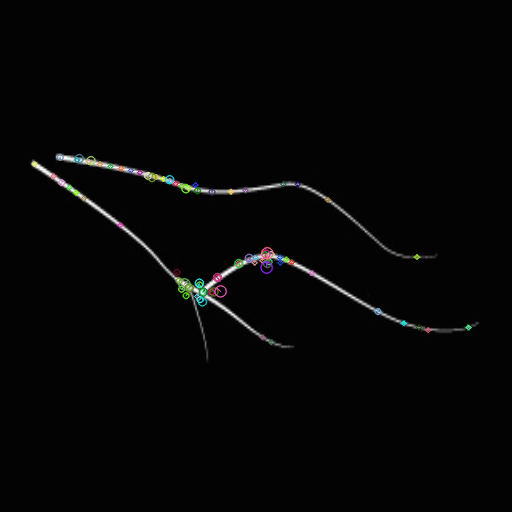

------------------------------------------------------------------------


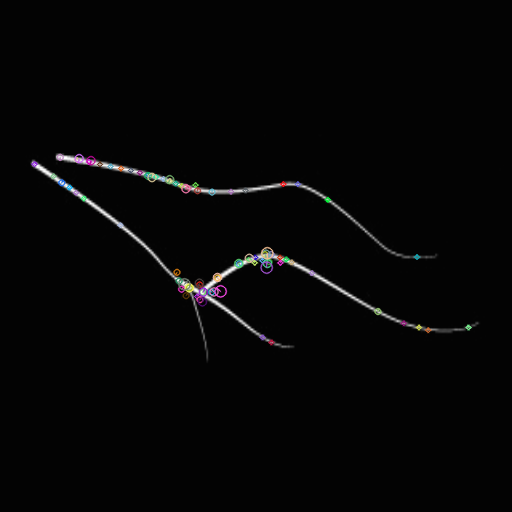

------------------------------------------------------------------------
------------------------------------------------------------------------


In [16]:
import cv2
from google.colab.patches import cv2_imshow

# Load images
image1 = cv2.imread('/content/finger vein with mask/mask/index_1-ConvertImage_0.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/finger vein with mask/mask/index_1-ConvertImage_0.png', cv2.IMREAD_GRAYSCALE)

# Initialize AKAZE detector
akaze = cv2.AKAZE_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = akaze.detectAndCompute(image1, None)
keypoints2, descriptors2 = akaze.detectAndCompute(image2, None)

# Draw keypoints on the images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
cv2_imshow(image1_with_keypoints)
print("------------------------------------------------------------------------")
cv2_imshow(image2_with_keypoints)
print("------------------------------------------------------------------------")
print("------------------------------------------------------------------------")
# Step 4: Matching and Recognition
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# # Display result
# cv2_imshow(matched_image)



Images are the same.
100.0 % matching


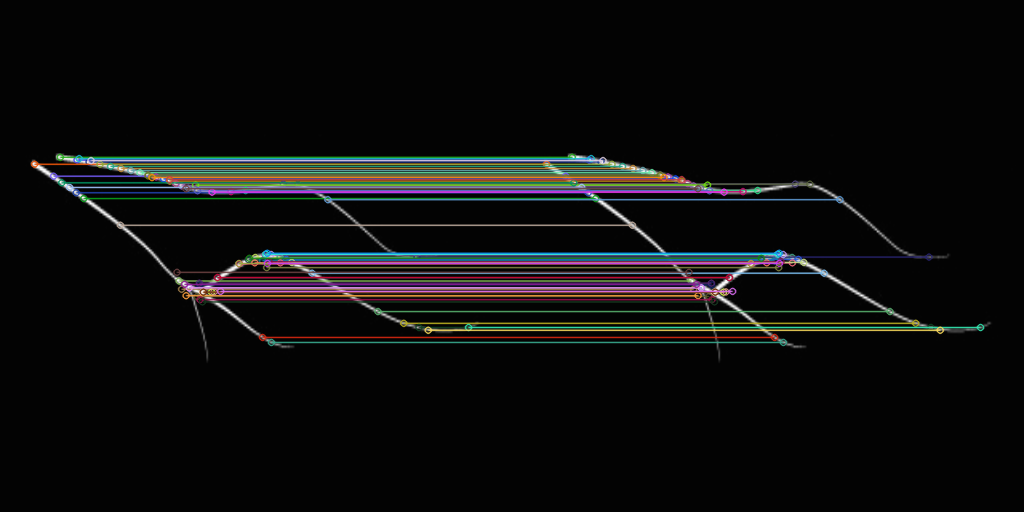

In [15]:
# Calculate matching percentage
matching_percentage = len(good_matches) / min(len(keypoints1), len(keypoints2)) * 100
THRESHOLD = 75
# Determine if images are the same
if matching_percentage > THRESHOLD:
    print("Images are the same.")
else:
    print("Images are different.")
print(matching_percentage,"% matching")
# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display result
cv2_imshow(matched_image)